# SPAC Demonstration Notebook
8/9/2024 on Synthetic Dataset

## Module Imports

In [1]:
# Import functions from modules in the spac package
from spac.data_utils import *
from spac.transformations import *
from spac.visualization import *
from spac.spatial_analysis import *

In [2]:
import copy
import numpy as np
import pandas as pd
from math import ceil, sqrt
import matplotlib.pyplot as plt
from functools import partial

## Data Preprocessing


### Load CSV Files

In [3]:
# Step 1: Load CSV files
file_names = ['SPAC_Synthetic_Example.csv']
data = load_csv_files(file_names)

2024-08-09 15:59:04,714 - INFO - CSVs are converted into dataframes and combined into a list!
2024-08-09 15:59:04,715 - INFO - Total of 1 dataframes in the list.
2024-08-09 15:59:04,715 - INFO - File name: SPAC_Synthetic_Example.csv
2024-08-09 15:59:04,716 - INFO - Info: 
2024-08-09 15:59:04,723 - INFO - None
2024-08-09 15:59:04,723 - INFO - Description: 
2024-08-09 15:59:04,737 - INFO -               XMin         YMin         XMax         YMax  Marker 1 Intensity  \
count  4000.000000  4000.000000  4000.000000  4000.000000         4000.000000   
mean     15.023263    27.503914    35.001047    47.485636           54.968939   
std      10.075772    22.520211    10.067823    22.526520           45.013052   
min       2.010295     1.830543    21.849440    22.012755            6.807492   
25%       4.968221     5.011522    24.988489    24.982587            9.966993   
50%      15.295660    27.223661    34.973920    47.365072           54.940240   
75%      25.078264    50.011596    45.0361

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 375.1+ KB


### Select Values and Subsetting the Dataset

In [4]:
# Step 2: Select values based on file name
# Subset data for each file name
subsets = []
slide_identifier_column = 'file_name'
unique_file_names = data[slide_identifier_column].unique()
for file_name in unique_file_names:
    print(f'Subsetting data for {file_name}')
    subset = select_values(data, annotation=slide_identifier_column, values=[file_name])
    subsets.append(subset)

2024-08-09 15:59:04,751 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 15:59:04,753 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 15:59:04,754 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 15:59:04,755 - INFO - Summary of returned dataset: 1000 cells match the selected labels.


Subsetting data for Halo_Synthetic_Example_1
Subsetting data for Halo_Synthetic_Example_2
Subsetting data for Halo_Synthetic_Example_3
Subsetting data for Halo_Synthetic_Example_4


### Add Customized Annotation to Subsets

In [5]:
# Step 3: Append new annotations to each subset
# Create a dictionary with file-specific labels
annotations_for_file=[
    {'slide': '1', 'animal': 'A'},
    {'slide': '2', 'animal': 'B'},
    {'slide': '3', 'animal': 'C'},
    {'slide': '4', 'animal': 'D'},
]

for i, subset in enumerate(subsets):
    subset = append_annotation(subset, annotations_for_file[i])


### Combine All Subsets

In [6]:
# Step 4: Combine the subsets back into a single DataFrame
combined_data = combine_dfs(subsets)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
dtypes: float64(7), int64(3), object(4)
memory usage: 437.6+ KB


### Convert Binary Label Columns into Single Catetorical Column

In [7]:
# Step 5: Convert binary columns to a categorical column
binary_columns = ['Immuno Cells', 'Normal Cells', 'Cancer Cells']
new_annotation = 'cell_type'
combined_data = bin2cat(combined_data, binary_columns, new_annotation)
combined_data.info()

Immuno Cells
Normal Cells
Cancer Cells
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
 14  cell_type           4000 non-null   object 
dtypes: float64(7), i

### Calculate Spatial Centroid of Cells

In [8]:
# Step 6: Calculate centroids for each cell
x_min_col = 'XMin'  # replace with your actual column name
x_max_col = 'XMin'  # replace with your actual column name
y_min_col = 'YMin'  # replace with your actual column name
y_max_col = 'YMax'  # replace with your actual column name
x_centroid = 'X_Centroid'
y_centroid = 'Y_Centroid'

combined_data = calculate_centroid(
    combined_data,
    x_min=x_min_col,
    x_max=x_max_col,
    y_min=y_min_col,
    y_max=y_max_col,
    new_x=x_centroid,
    new_y=y_centroid
)

combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
 14  cell_type           4000 non-null   object 
 15  X_Centroid          4000 non-null   float64
 16  Y_Cent

### Setup the Analysis with Selected Features and Annotations

In [9]:
# Step 6: Select and prepare columns for analysis
intensity_columns = [col for col in combined_data.columns if col.startswith('Marker')]

# Columns for centroid calculations and other necessary metadata
x_col = x_centroid
y_col = y_centroid
annotation_columns = ['slide', 'animal', 'cell_type']

# Ingest the data into an AnnData object
adata = ingest_cells(
    dataframe=combined_data,
    regex_str=intensity_columns,
    x_col=x_col,
    y_col=y_col,
    annotation=annotation_columns
)

print(adata)

Marker 1 Intensity
Marker 2 Intensity
Marker 3 Intensity
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'


/data/BIDS-HPC/private/conda/envs/spac_demo_v07/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Data Transformation

### Normalization with Arcsinh Transformation

In [10]:
# Step 7: Normalize the features
# Normalize the features with default settings
norm_output_layer = 'arcsinh_norm'
arcsinh_transformation(
    adata,
    co_factor=5,
    output_layer=norm_output_layer
)
print(f"Transformed data stored in layer: {norm_output_layer}")
dataframe = pd.DataFrame(adata.layers[norm_output_layer])
print(dataframe.describe())
print(adata)

Transformed data stored in layer: arcsinh_norm
                 0            1            2
count  4000.000000  4000.000000  4000.000000
mean      2.563419     2.564666     2.997854
std       1.127568     1.127006     0.020174
min       1.115398     1.083621     2.917722
25%       1.440679     1.443686     2.984560
50%       2.684105     2.688077     2.998463
75%       3.689233     3.689794     3.010953
max       3.716741     3.720860     3.070602
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'
    layers: 'arcsinh_norm'


### Scale the Normalized Dataset

In [11]:
# Step 8: Scale the features
# Scale the normalized features with default settings
norm_scaled_output_layer = 'arcsinh_scaled'
normalize_features(
    adata,
    input_layer=norm_output_layer,
    output_layer=norm_scaled_output_layer,
    low_quantile=0,
    high_quantile=1,
    interpolation='nearest')
print(f"Transformed data stored in layer: {norm_scaled_output_layer}")
dataframe = pd.DataFrame(adata.layers[norm_scaled_output_layer])
print(dataframe.describe())
print(adata)

Transformed data stored in layer: arcsinh_scaled
                 0            1            2
count  4000.000000  4000.000000  4000.000000
mean      0.556644     0.561589     0.524153
std       0.433456     0.427343     0.131957
min       0.000000     0.000000     0.000000
25%       0.125044     0.136531     0.437195
50%       0.603037     0.608385     0.528131
75%       0.989425     0.988221     0.609832
max       1.000000     1.000000     1.000000
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'
    layers: 'arcsinh_norm', 'arcsinh_scaled'


### UMAP Dimention Reduction

In [12]:
# Step 9: Run UMAP Dimention Reduction
n_neighbors = 200
n_components = 2
min_dist = 0.1
metric = 'euclidean'
random_state = 0
transform_seed = 42
layer = norm_scaled_output_layer
run_umap(
    adata=adata,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=random_state,
    transform_seed=transform_seed,
    layer=layer
)

2024-08-09 15:59:05,185 - INFO - Using the table:"arcsinh_scaled"
/data/BIDS-HPC/private/conda/envs/spac_demo_v07/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_norm', 'arcsinh_scaled'

## Unsupervised Clustering

### Unsupervised Clustering with Phenograph

In [13]:
# Step 10: Run Phenograph clustering
list_of_resolution = [0.01, 0.1, 0.2, 0.5, 0.8, 1]
K_NN_Value = 30
cluster_annotations = []
for resolution in list_of_resolution:
    annotation_name = f'phenograph_k{K_NN_Value}_{resolution}'
    cluster_annotations.append(annotation_name)
    phenograph_clustering(
        adata,
        layer=norm_scaled_output_layer,
        features=adata.var.index.to_list(),  # Use all available features
        k=K_NN_Value,
        seed=42,
        output_annotation=annotation_name,
        resolution_parameter=resolution
    )

for annotation_name in cluster_annotations:
    num_clusters = adata.obs[annotation_name].nunique()
    print(f'\nNumber of clusters identified in "{annotation_name}": {num_clusters}')

print(adata)

2024-08-09 15:59:35,793 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:35,794 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.030628681182861328 seconds
Jaccard graph constructed in 2.6909873485565186 seconds
Running Leiden optimization
Leiden completed in 0.2590062618255615 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.138000726699829 seconds


2024-08-09 15:59:39,945 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:39,946 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.018724441528320312 seconds
Jaccard graph constructed in 2.2388484477996826 seconds
Running Leiden optimization
Leiden completed in 0.25343966484069824 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.2855072021484375 seconds


2024-08-09 15:59:44,234 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:44,235 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.02666163444519043 seconds
Jaccard graph constructed in 2.0624196529388428 seconds
Running Leiden optimization
Leiden completed in 0.4288022518157959 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.289341688156128 seconds


2024-08-09 15:59:48,529 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:48,530 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.042392730712890625 seconds
Jaccard graph constructed in 2.61950421333313 seconds
Running Leiden optimization
Leiden completed in 0.441709041595459 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.0451250076293945 seconds


2024-08-09 15:59:53,579 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:53,579 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.026602983474731445 seconds
Jaccard graph constructed in 2.6118009090423584 seconds
Running Leiden optimization
Leiden completed in 0.6849102973937988 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.349496841430664 seconds


2024-08-09 15:59:58,939 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 15:59:58,940 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.03432440757751465 seconds
Jaccard graph constructed in 3.081583261489868 seconds
Running Leiden optimization
Leiden completed in 0.6668810844421387 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.392859935760498 seconds

Number of clusters identified in "phenograph_k30_0.01": 4

Number of clusters identified in "phenograph_k30_0.1": 6

Number of clusters identified in "phenograph_k30_0.2": 9

Number of clusters identified in "phenograph_k30_0.5": 14

Number of clusters identified in "phenograph_k30_0.8": 19

Number of clusters identified in "phenograph_k30_1": 21
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type', 'phenograph_k30_0.01', 'phenograph_k30_0.1', 'phenograph_k30_0.2', 'phenograph_k30_0.5', 'phenograph_k30_0.8', 'phenograph_k30_1'
    uns: 'phenograph_features'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_nor

### Cluster Renaming

In [38]:
original_column = "phenograph_k30_0.01"
renamed_column = "renamed_clusters"

mappings = {
    "0":"Phenotype-A",
    "1":"Phenotype-B",
    "2":"Phenotype-C",
    "3":"Phenotype-D",
    }

print("Cluster Name Mapping: \n", mappings)

rename_annotations(
    adata, 
    src_annotation=original_column,
    dest_annotation=renamed_column,
    mappings=mappings)

print("After Renaming Clusters: \n", adata)

print("\n\n\nPhenograph Cluster Count: \n", 
len(adata.obs[renamed_column].unique().tolist()))

print("\n\n\nPhenograph Cluster Names: \n", 
    adata.obs[renamed_column].unique().tolist())


print(adata)

Cluster Name Mapping: 
 {'0': 'Phenotype-A', '1': 'Phenotype-B', '2': 'Phenotype-C', '3': 'Phenotype-D'}
The data type of the original column 'phenograph_k30_0.01' is category.
After Renaming Clusters: 
 AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type', 'phenograph_k30_0.01', 'phenograph_k30_0.1', 'phenograph_k30_0.2', 'phenograph_k30_0.5', 'phenograph_k30_0.8', 'phenograph_k30_1', 'renamed_clusters'
    uns: 'phenograph_features', 'slide_colors', 'animal_colors', 'cell_type_colors', 'phenograph_k30_0.01_colors', 'phenograph_k30_0.1_colors', 'phenograph_k30_0.2_colors', 'phenograph_k30_0.5_colors', 'phenograph_k30_0.8_colors', 'phenograph_k30_1_colors'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_norm', 'arcsinh_scaled'



Phenograph Cluster Count: 
 4



Phenograph Cluster Names: 
 ['Phenotype-A', 'Phenotype-C', 'Phenotype-B', 'Phenotype-D']
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type', 'phenograph_k30

## Visualizations

In [14]:
# Get all annotations (column names) from adata.obs
annotations = adata.obs.columns.tolist()
n_annotations = len(annotations)

# Calculate the number of rows and columns needed
n_cols = ceil(sqrt(n_annotations))
n_rows = ceil(n_annotations / n_cols)

def generate_grid_frame(
        fig_width,
        fig_height,
        dpi
    ):
    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(
            fig_width,
            fig_height
        ),
        dpi=dpi
        )
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    return fig, axes

### UMAP Visualization of Annotations

Running visualization using the coordinates: "X_umap"
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 1000
Cluster: 4, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: A, Points: 1000
Cluster: B, Points: 1000
Cluster: C, Points: 1000
Cluster: D, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: Cancer Cells, Points: 1360
Cluster: Immuno Cells, Points: 1391
Cluster: Normal Cells, Points: 1249
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 525
Cluster: 4, Points: 314
Cluster: 5, Points: 161
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 691
Cluster: 2, Points: 633
Cluster: 3, Points: 367
Cluster: 4, Points: 314


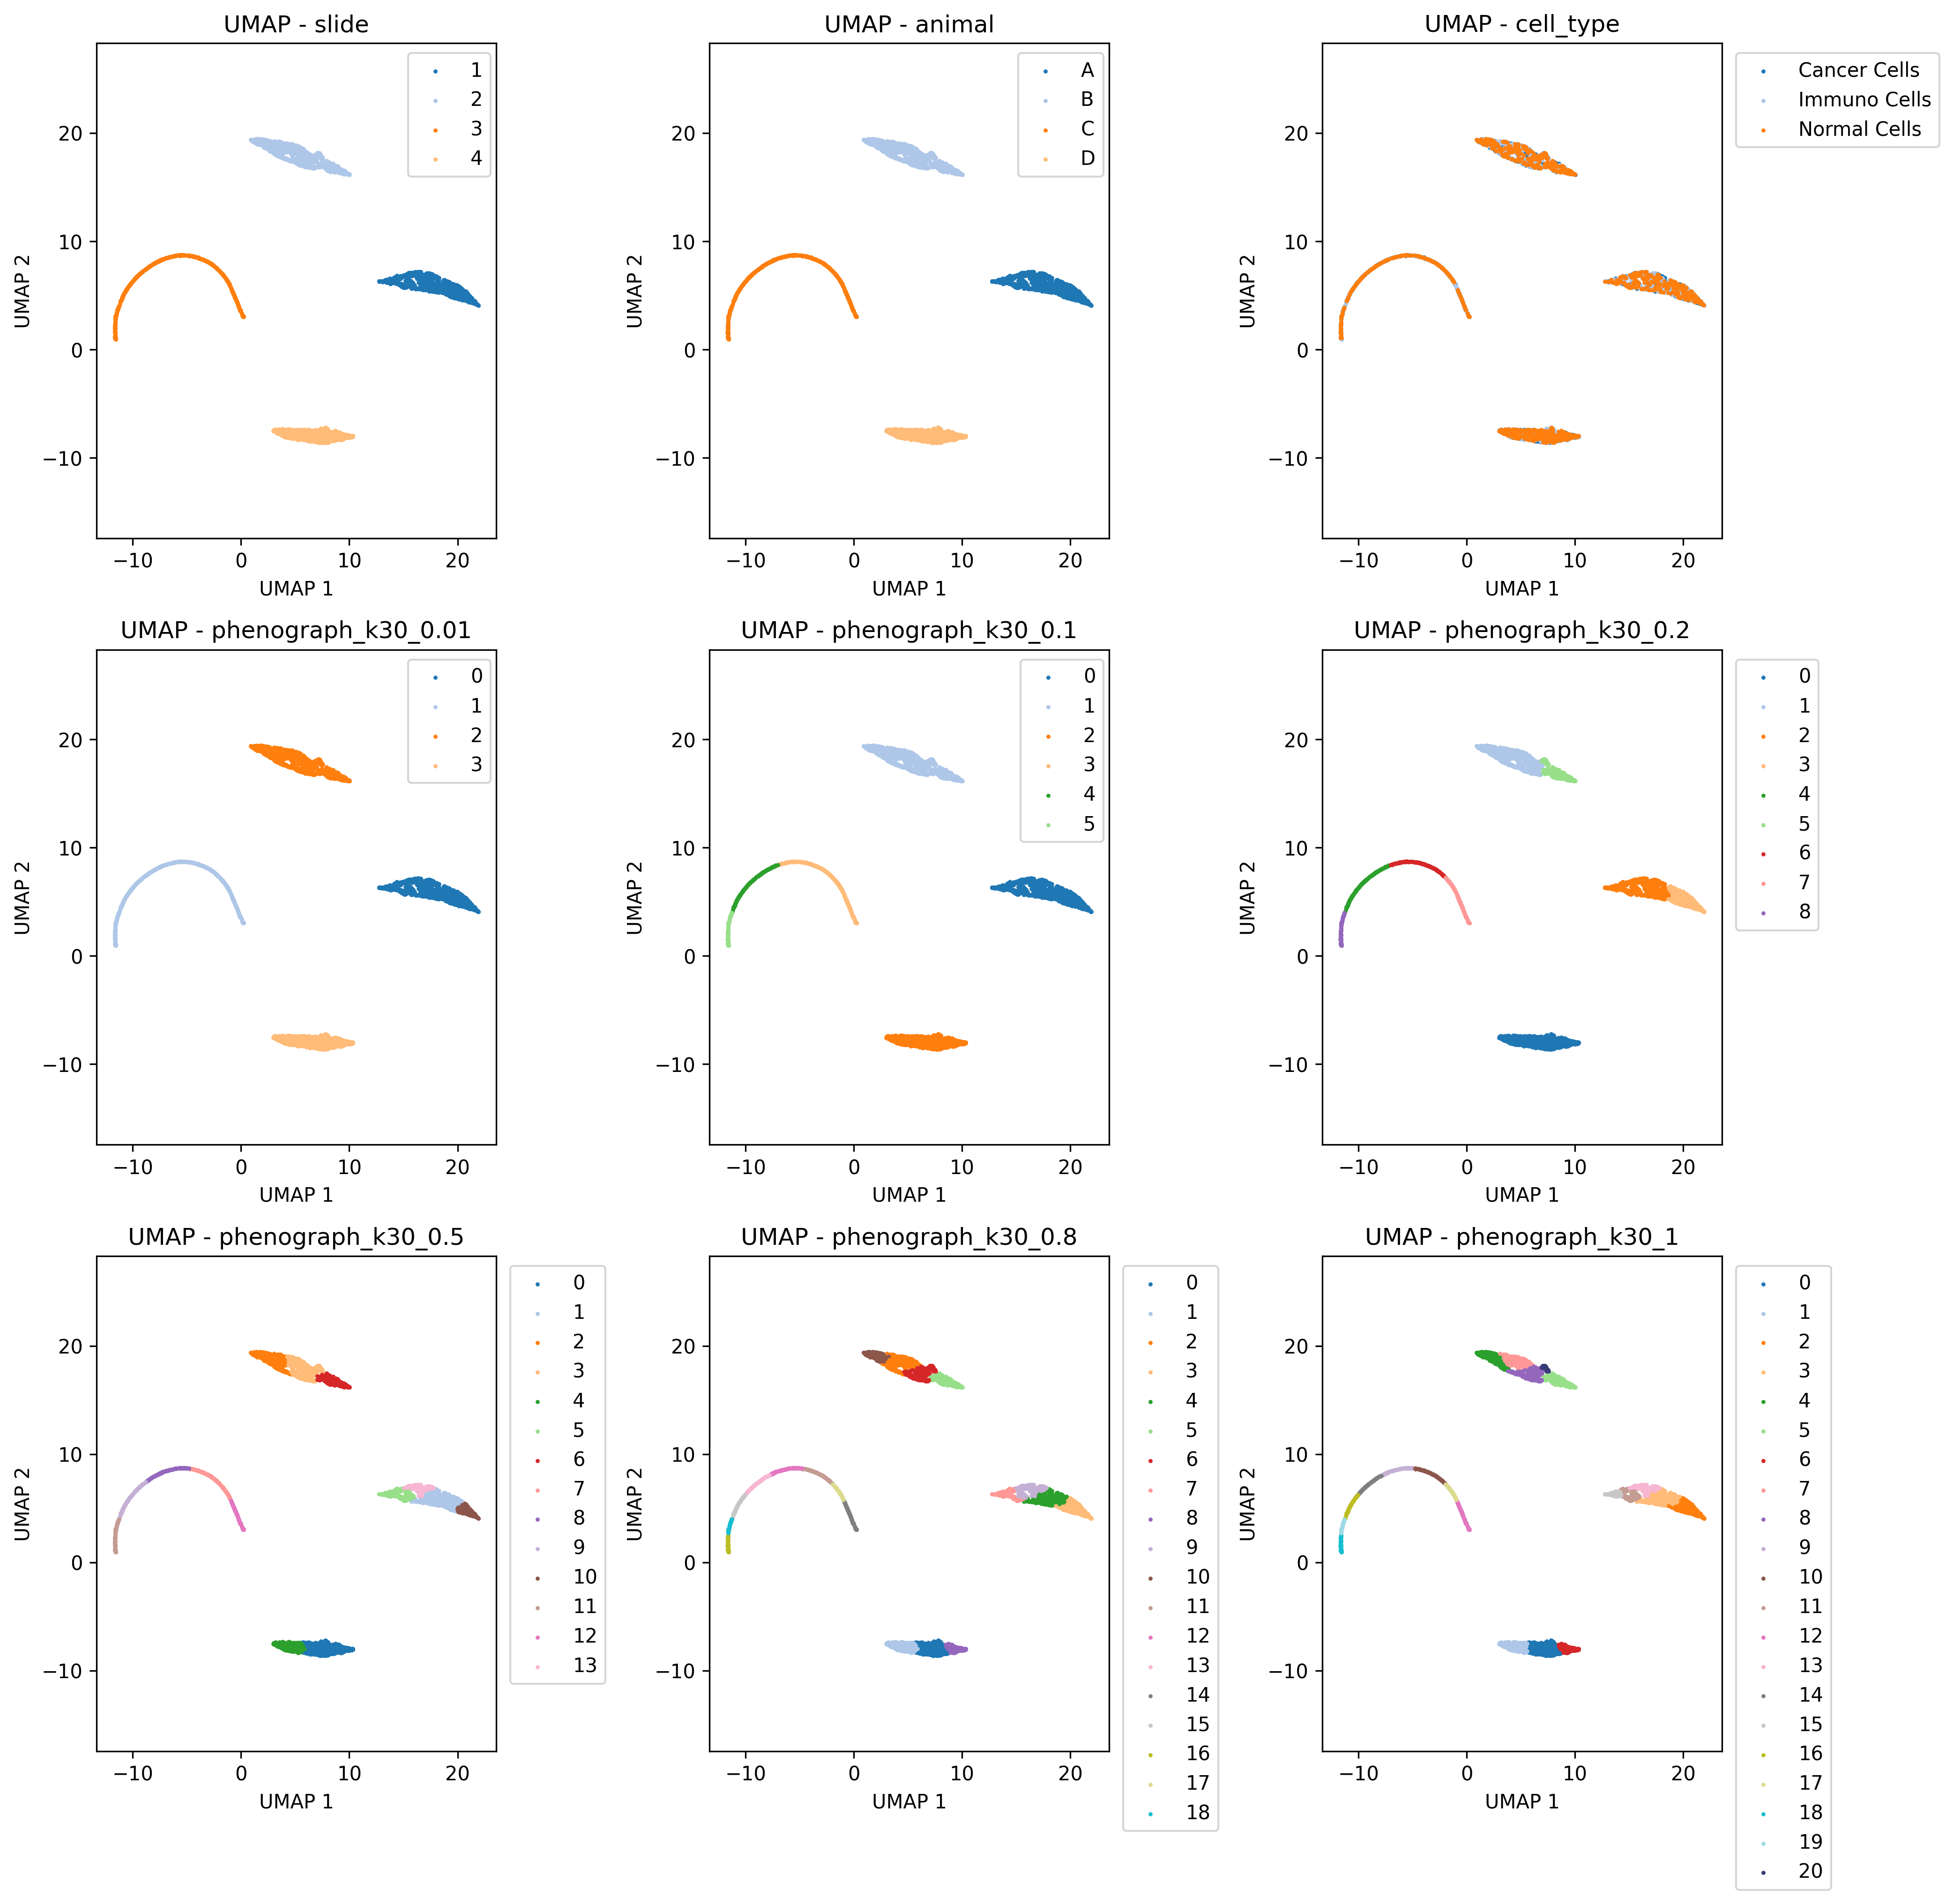

In [15]:
# Visualizations
# Plot UMAP with cluster annotations

# Setup plot parameters
feature = None
layer = "arcsinh_scaled"
method = "umap"
fig_width = 14
fig_height = 14
font_size = 12
fig_dpi = 300    
legend_location = "best"

fig, axes = generate_grid_frame(
    fig_width=fig_width,
    fig_height=fig_height,
    dpi=fig_dpi
)

# Loop through each annotation and create UMAP plots
for i, annotation in enumerate(annotations):
    ax = axes[i]
    
    # Plot the UMAP for the current annotation
    fig, ax = dimensionality_reduction_plot(
        adata=adata,
        method=method,
        annotation=annotation,
        feature=feature,
        layer=layer,
        ax=ax
    )
    
    # Set plot title and other properties
    ax.set_title(f"UMAP - {annotation}", fontsize=font_size)
    ax.legend(loc=legend_location, bbox_to_anchor=(1.01, 1))
    ax.grid(False)

# Hide any unused subplots (if any)
for i in range(n_annotations, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### Box Plot of Features

Legend does not exist.


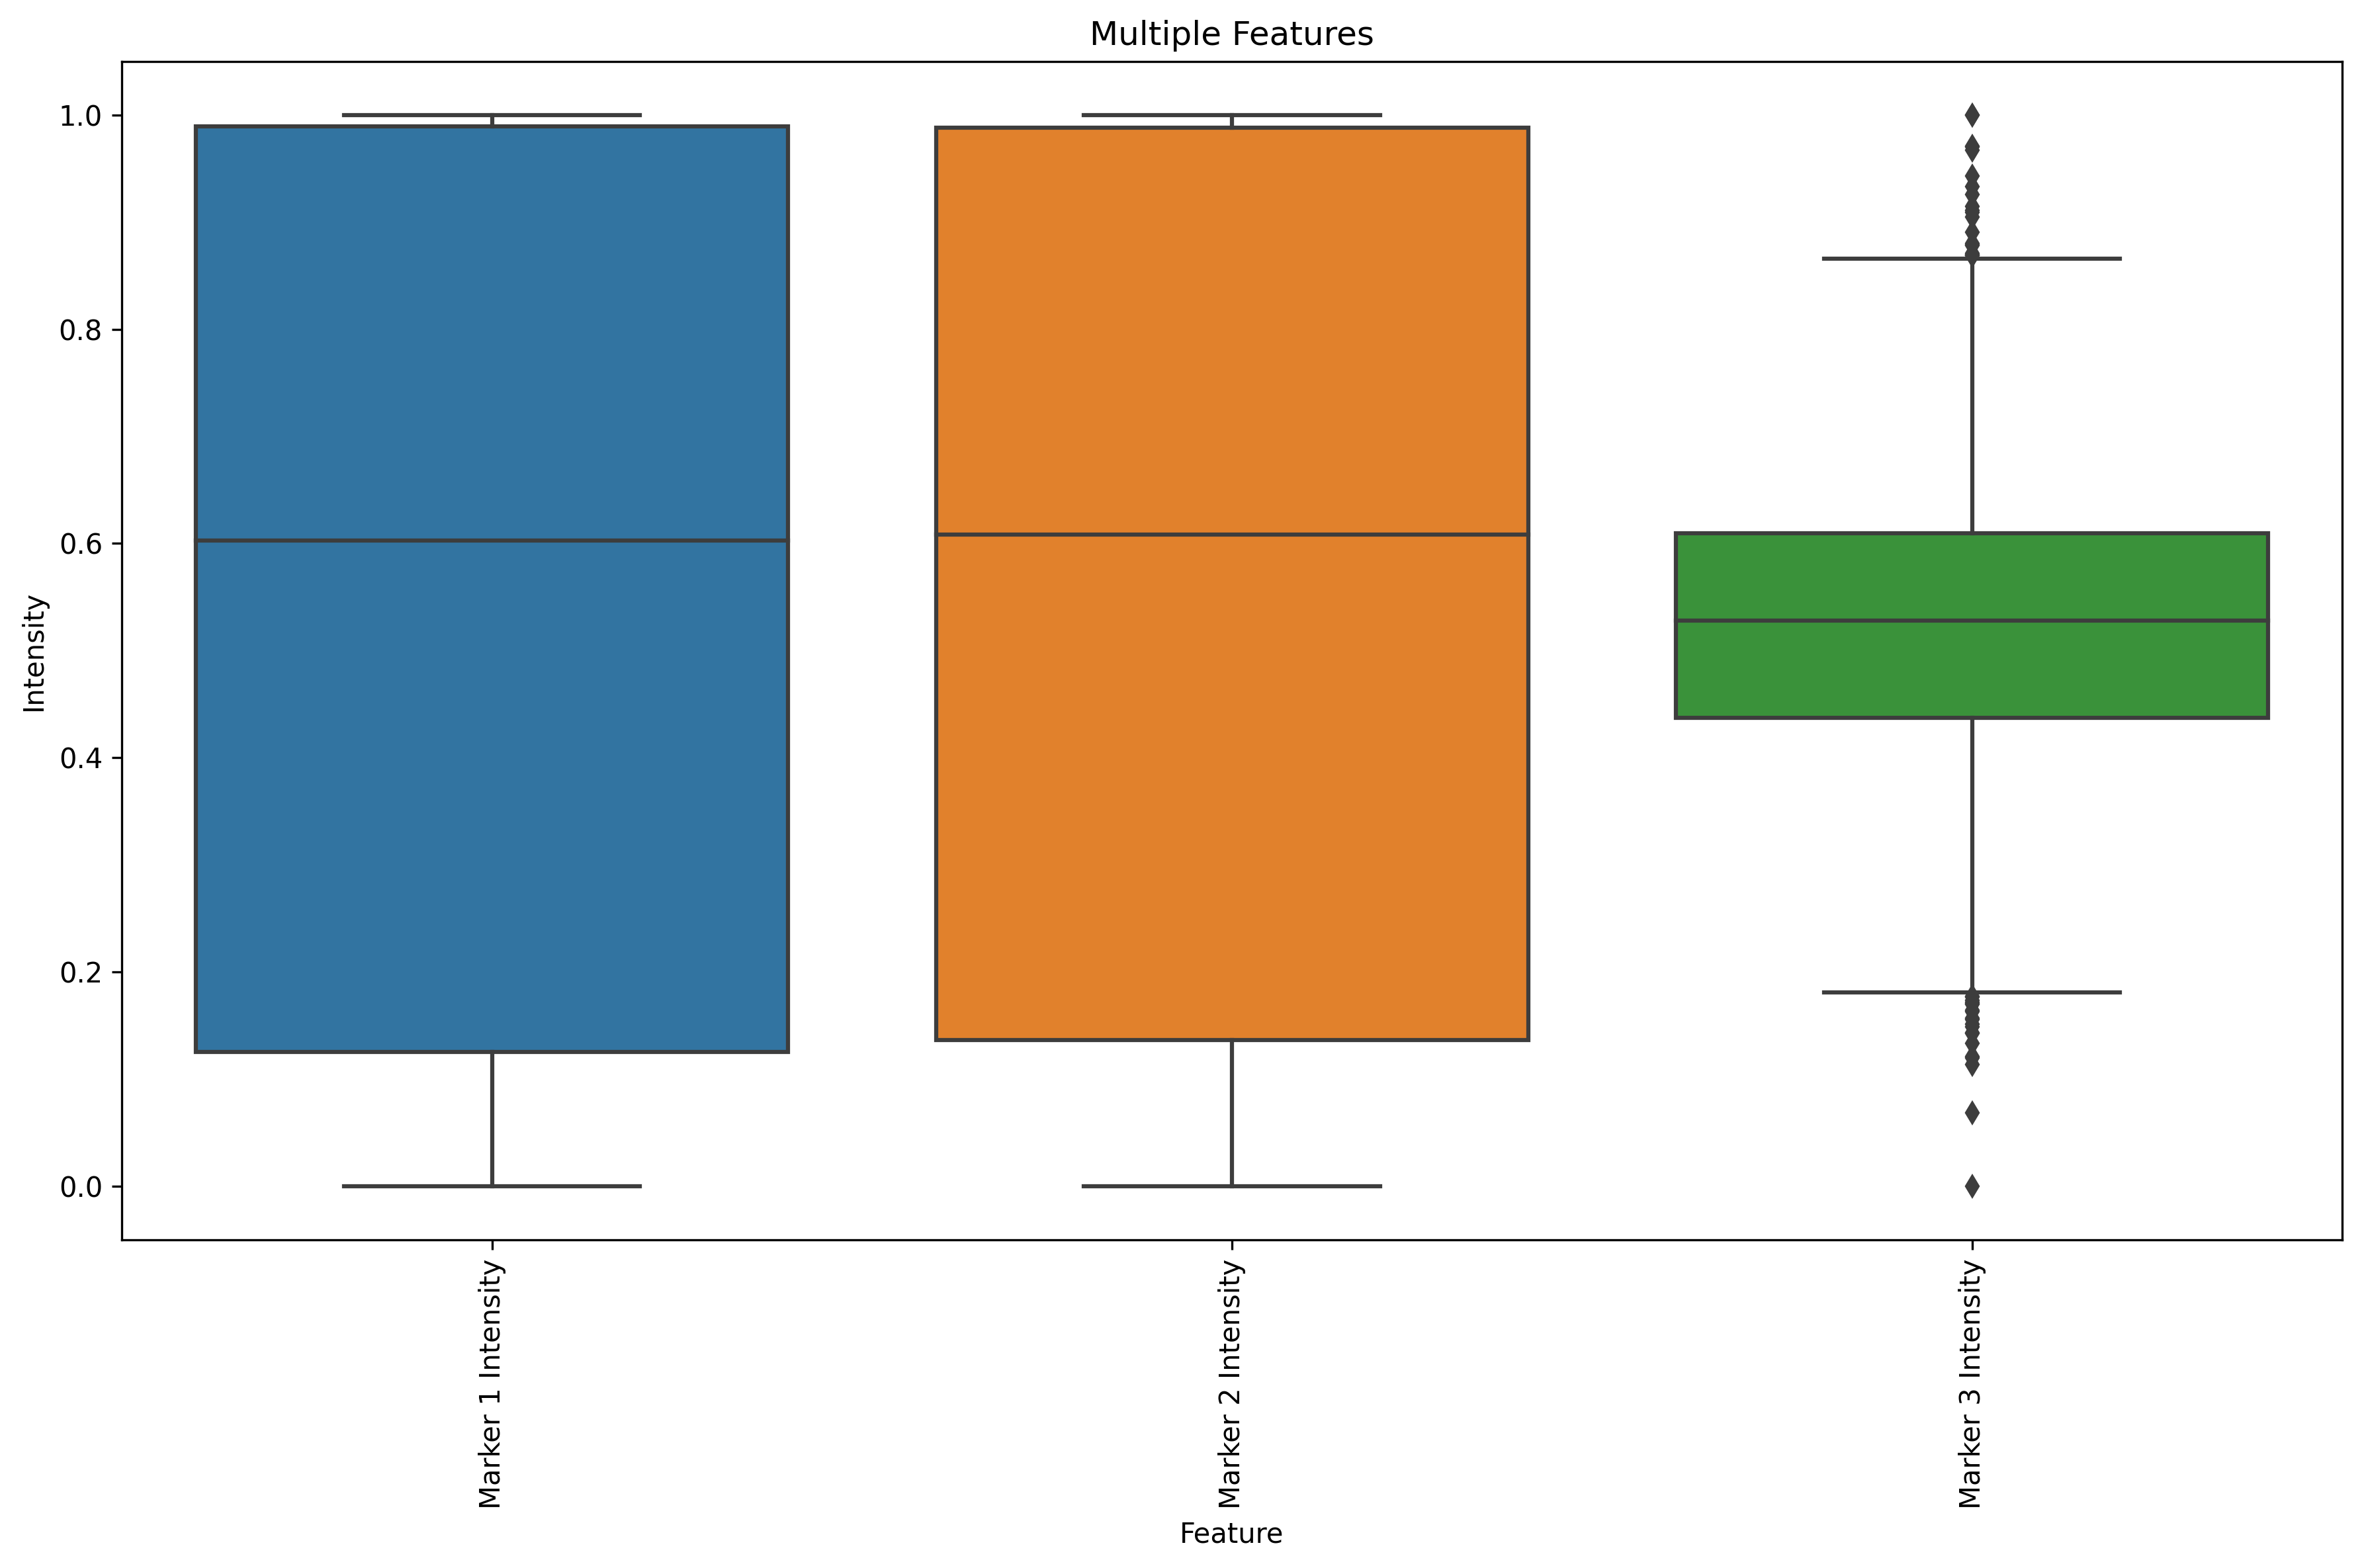

In [16]:
annotation = None
layer_to_plot = norm_scaled_output_layer
feature_to_plot = None
log_scale = False
Figure_Orientation="v"


Figure_Title = "BoxPlot"
Figure_Horizontal=False    
fig_width = 12
fig_height = 8
fig_dpi = 300
font_size = 10    

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': font_size})
fig.set_size_inches(fig_width, fig_height)
fig.set_dpi(fig_dpi)

fig = boxplot(
    adata=adata,
    ax=ax,
    layer=layer_to_plot,
    annotation=annotation,
    second_annotation=None,
    features=feature_to_plot,
    log_scale=log_scale,
    orient=Figure_Orientation
)

# Move the legend outside the plotting area

# Check if a legend exists
try:
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
except Exception as e:
    print(f"Legend does not exist.")

# plt.close('all')
plt.tight_layout()
plt.show()

### Box Plot of All Annotations

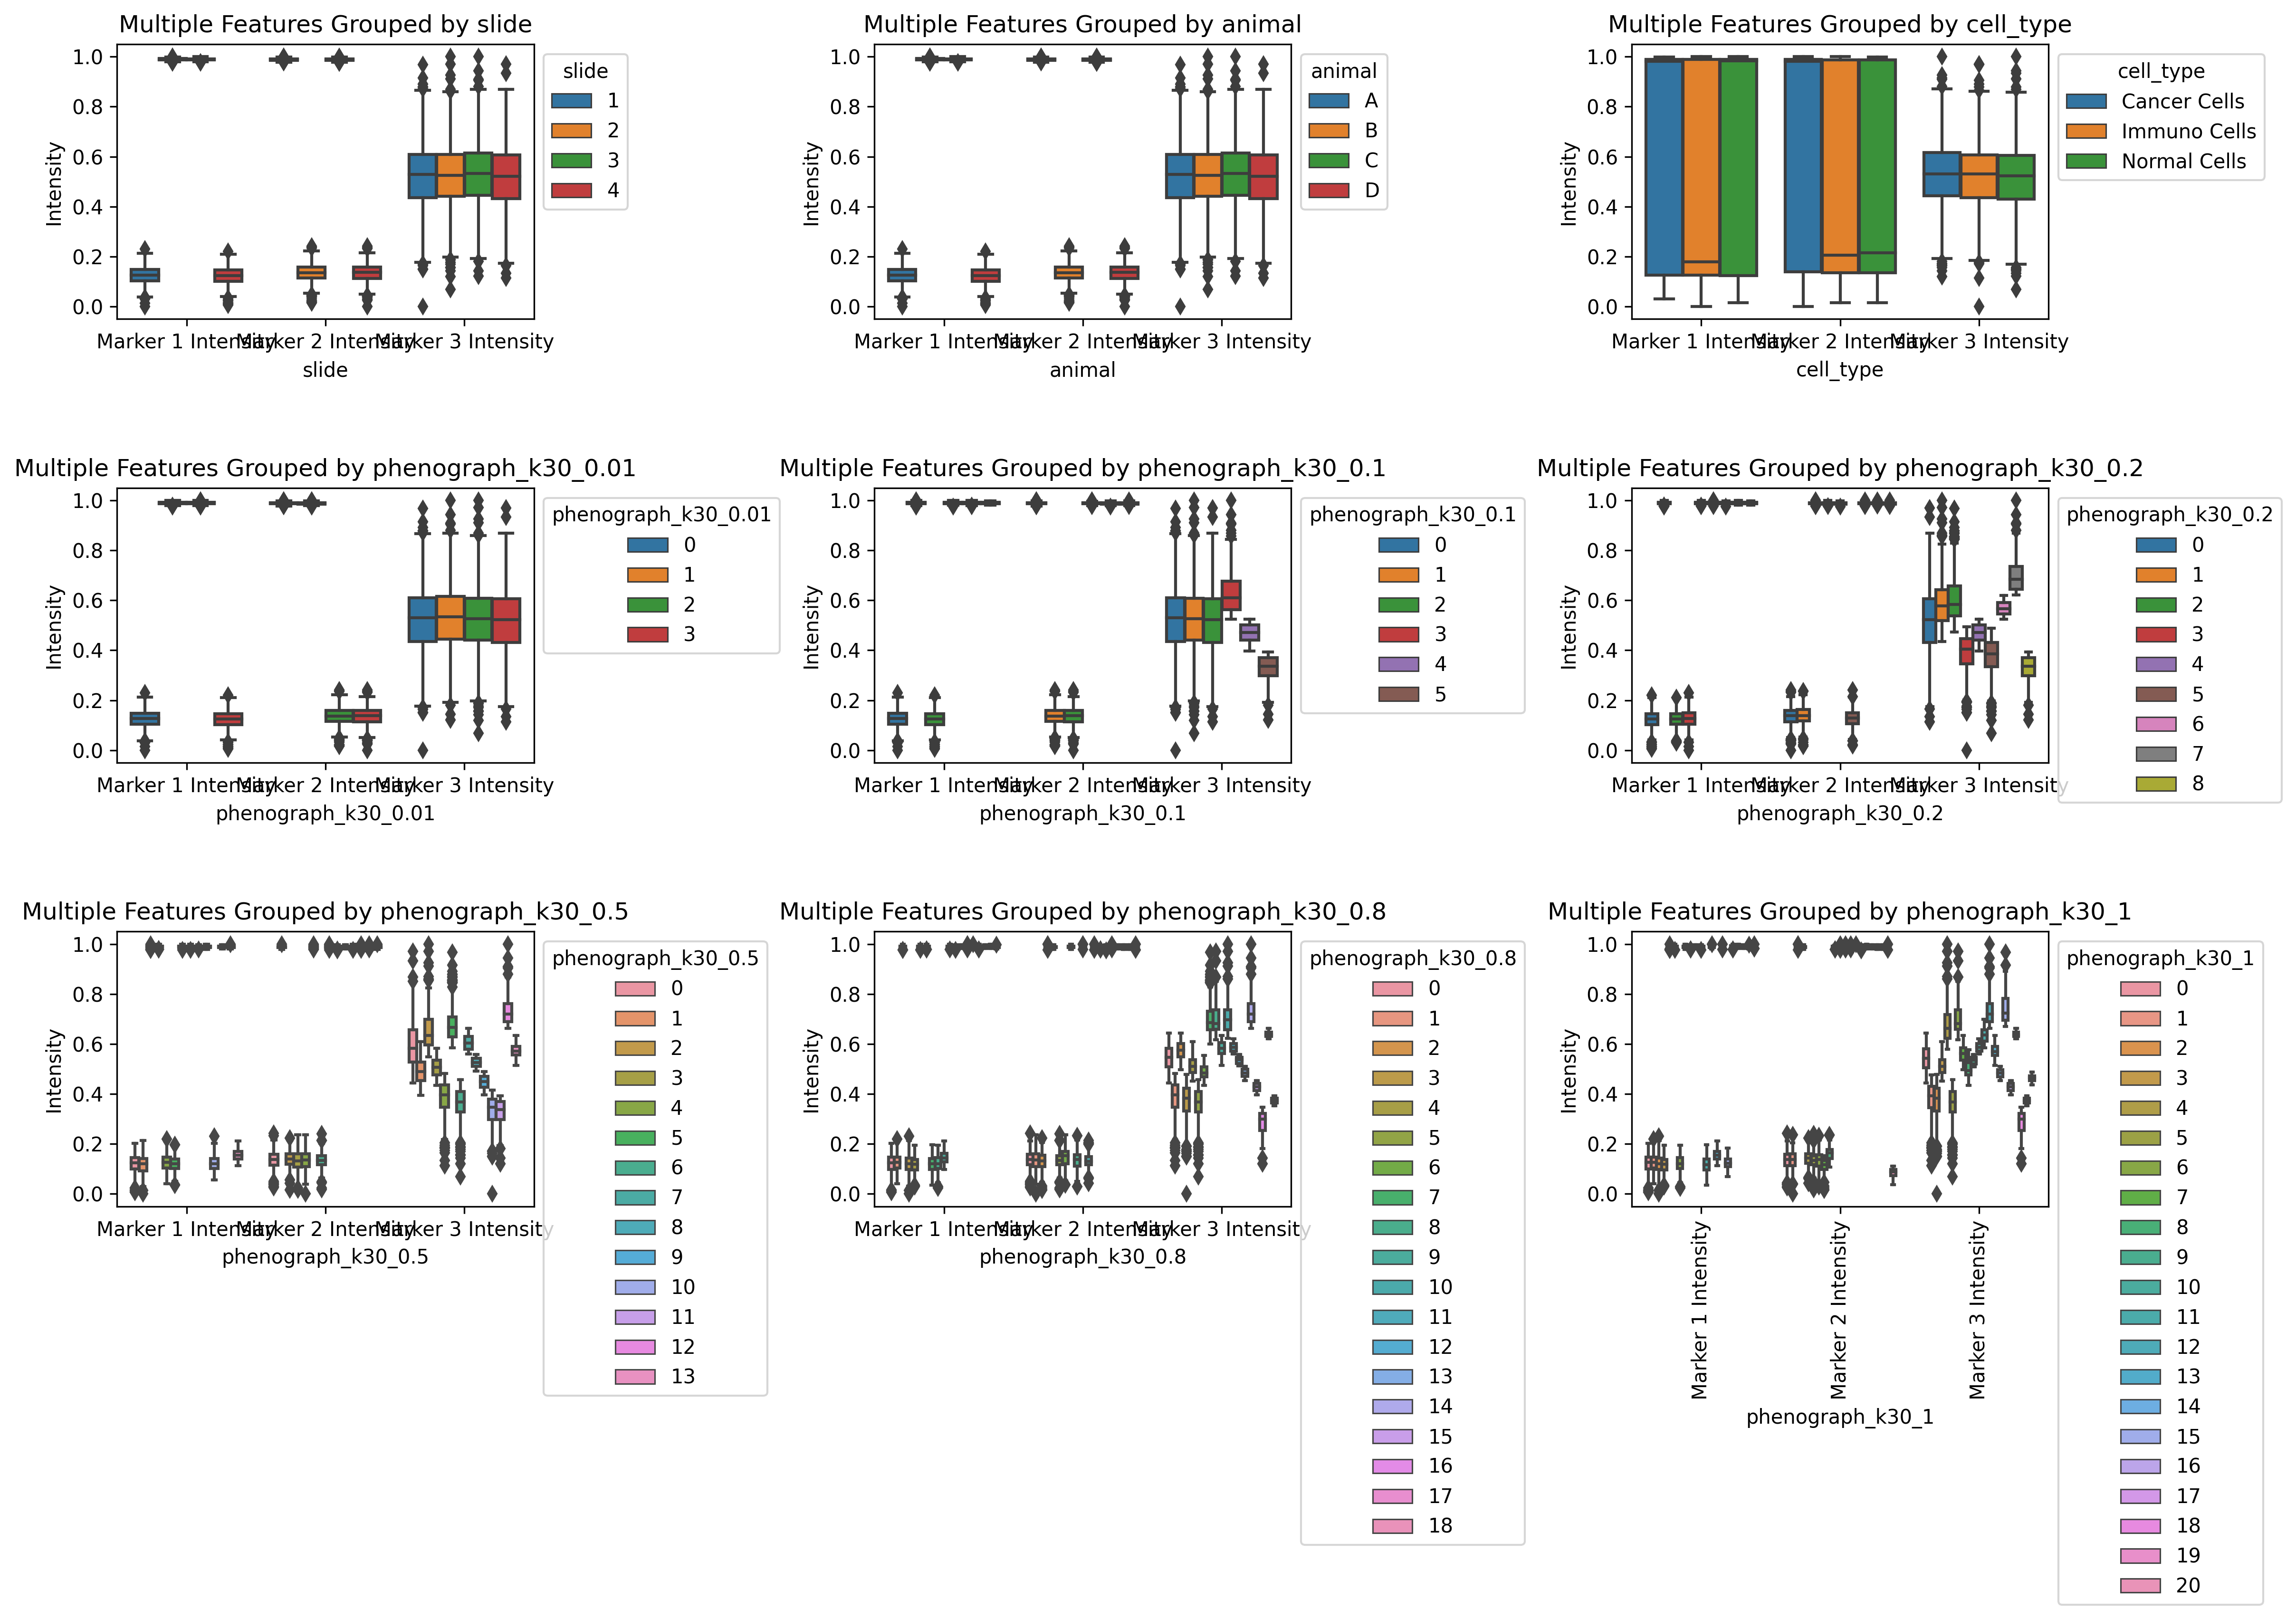

In [17]:
annotation = None
layer_to_plot = norm_scaled_output_layer
feature_to_plot = None
log_scale = False
Figure_Orientation="v"


Figure_Title = "BoxPlot"
Figure_Horizontal=False    
fig_width = 16
fig_height = 12
fig_dpi = 300
font_size = 10    



fig, axes = generate_grid_frame(
    fig_width=fig_width,
    fig_height=fig_height,
    dpi=fig_dpi
)

# Loop through each annotation and create UMAP plots
for i, annotation in enumerate(annotations):
    ax = axes[i]
    
    plt.rcParams.update({'font.size': font_size})
    ax.set_title(f"UMAP - {annotation}", fontsize=font_size)
    ax.grid(False)


    fig = boxplot(
        adata=adata,
        ax=ax,
        layer=layer_to_plot,
        annotation=annotation,
        second_annotation=None,
        features=feature_to_plot,
        log_scale=log_scale,
        orient=Figure_Orientation
    )

    # Move the legend outside the plotting area

    # Check if a legend exists
    try:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    except Exception as e:
        print(f"Legend does not exist.")
    

# Hide any unused subplots (if any)
for i in range(n_annotations, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Histogram of Features

In [18]:
def grid_plot_for_hisotmap(feature):
    fig, axes = generate_grid_frame(
        fig_width=fig_width,
        fig_height=fig_height,
        dpi=fig_dpi
    )

    # Loop through each annotation and create UMAP plots
    for i, annotation in enumerate(annotations):
        ax = axes[i]

        num_rows = adata.X.shape[0]

        def cal_bin_num(
            num_rows
        ):
            bins = max(int(2*(num_rows ** (1/3))), 1)
            print(f'Automatically calculated number of bins is: {bins}')
            return(bins)
        
        if feature:
            bins = None     
            if bins is None:
                bins = cal_bin_num(num_rows)
            elif bins <= 0:
                raise ValueError(f'Bins should be a positive integer. Received "{bins}"')
        
        fig, ax = histogram(
            adata=adata,
            feature=feature,
            annotation=None,
            layer=norm_scaled_output_layer,
            group_by=annotation,
            together=True,
            ax=ax,
            log_scale=(False,True),
            multiple="dodge",
            shrink=1,
            bins="auto",
            alpha=0.75,
            stat='count'
        )

        # Move the legend outside the plotting area

        get_axes = fig.get_axes()
        # Check if the axis has a legend
        for ax in get_axes:
            has_legend = ax.get_legend() is not None
            xlabel = ax.get_xlabel()

            if has_legend:
                sns.move_legend(ax, 
                            legend_location, 
                            bbox_to_anchor=(1, 1))

    # Hide any unused subplots (if any)
    for i in range(n_annotations, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

#### Marker 1 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


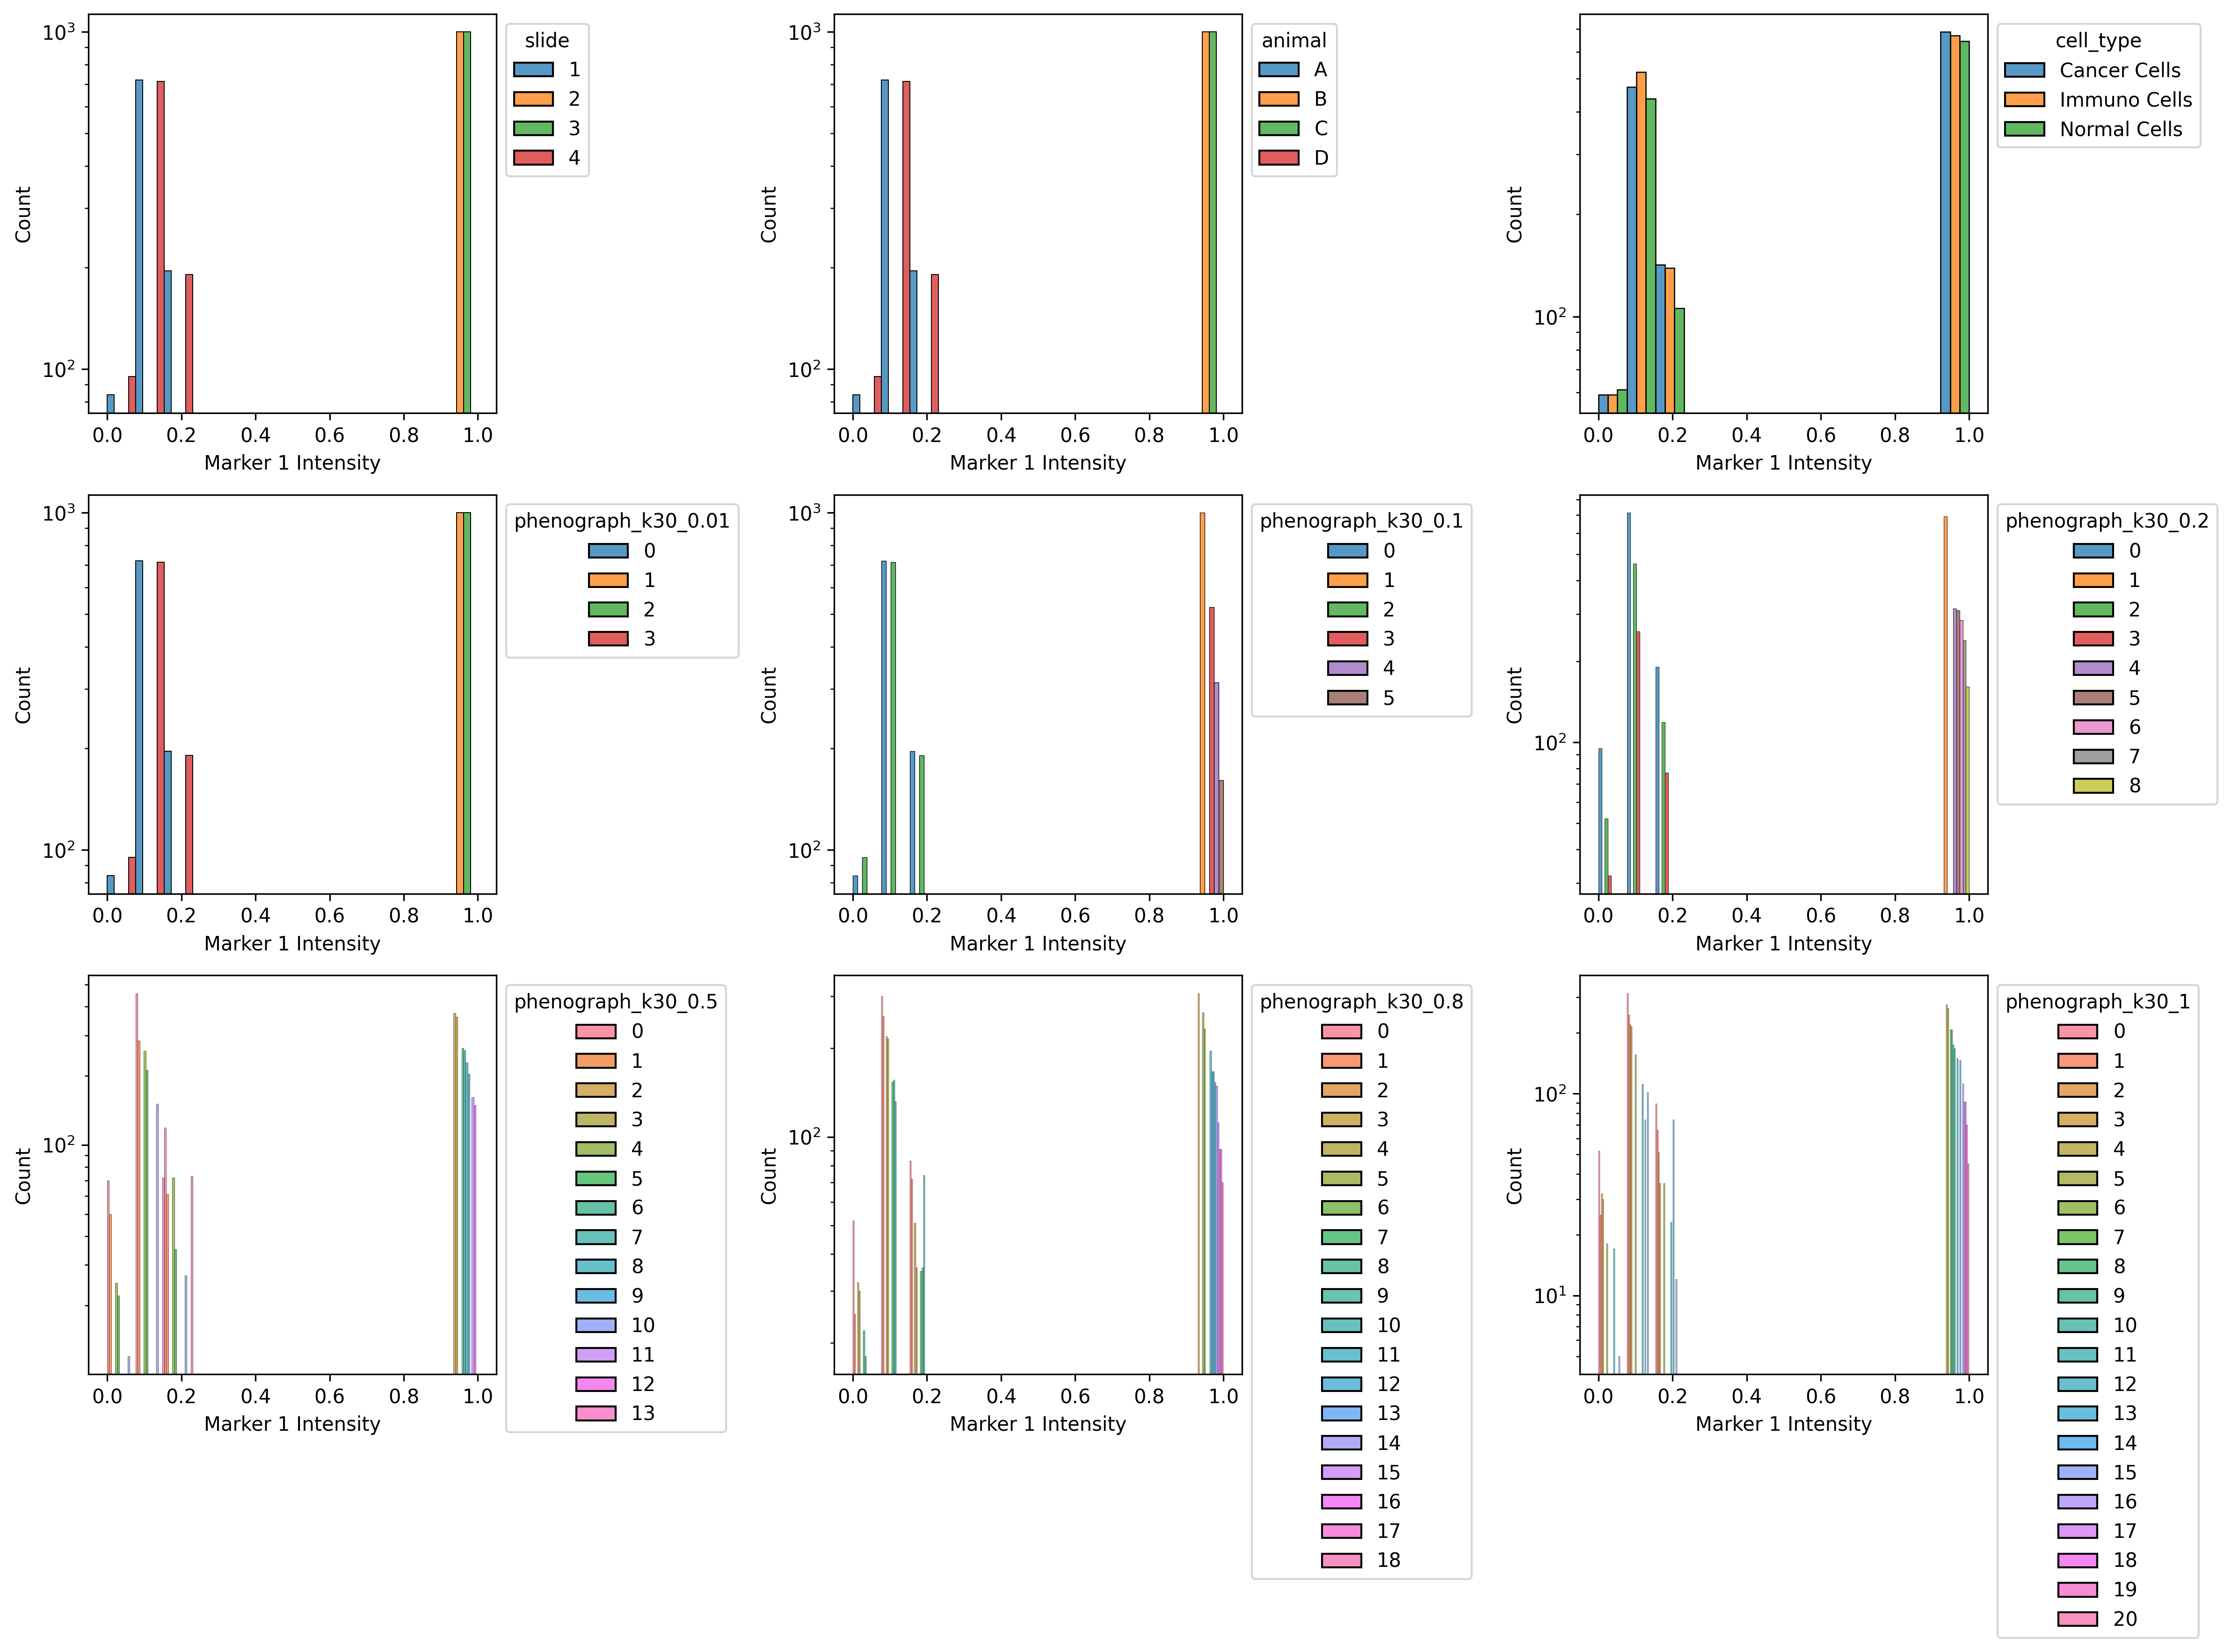

In [19]:
grid_plot_for_hisotmap("Marker 1 Intensity")


#### Marker 2 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


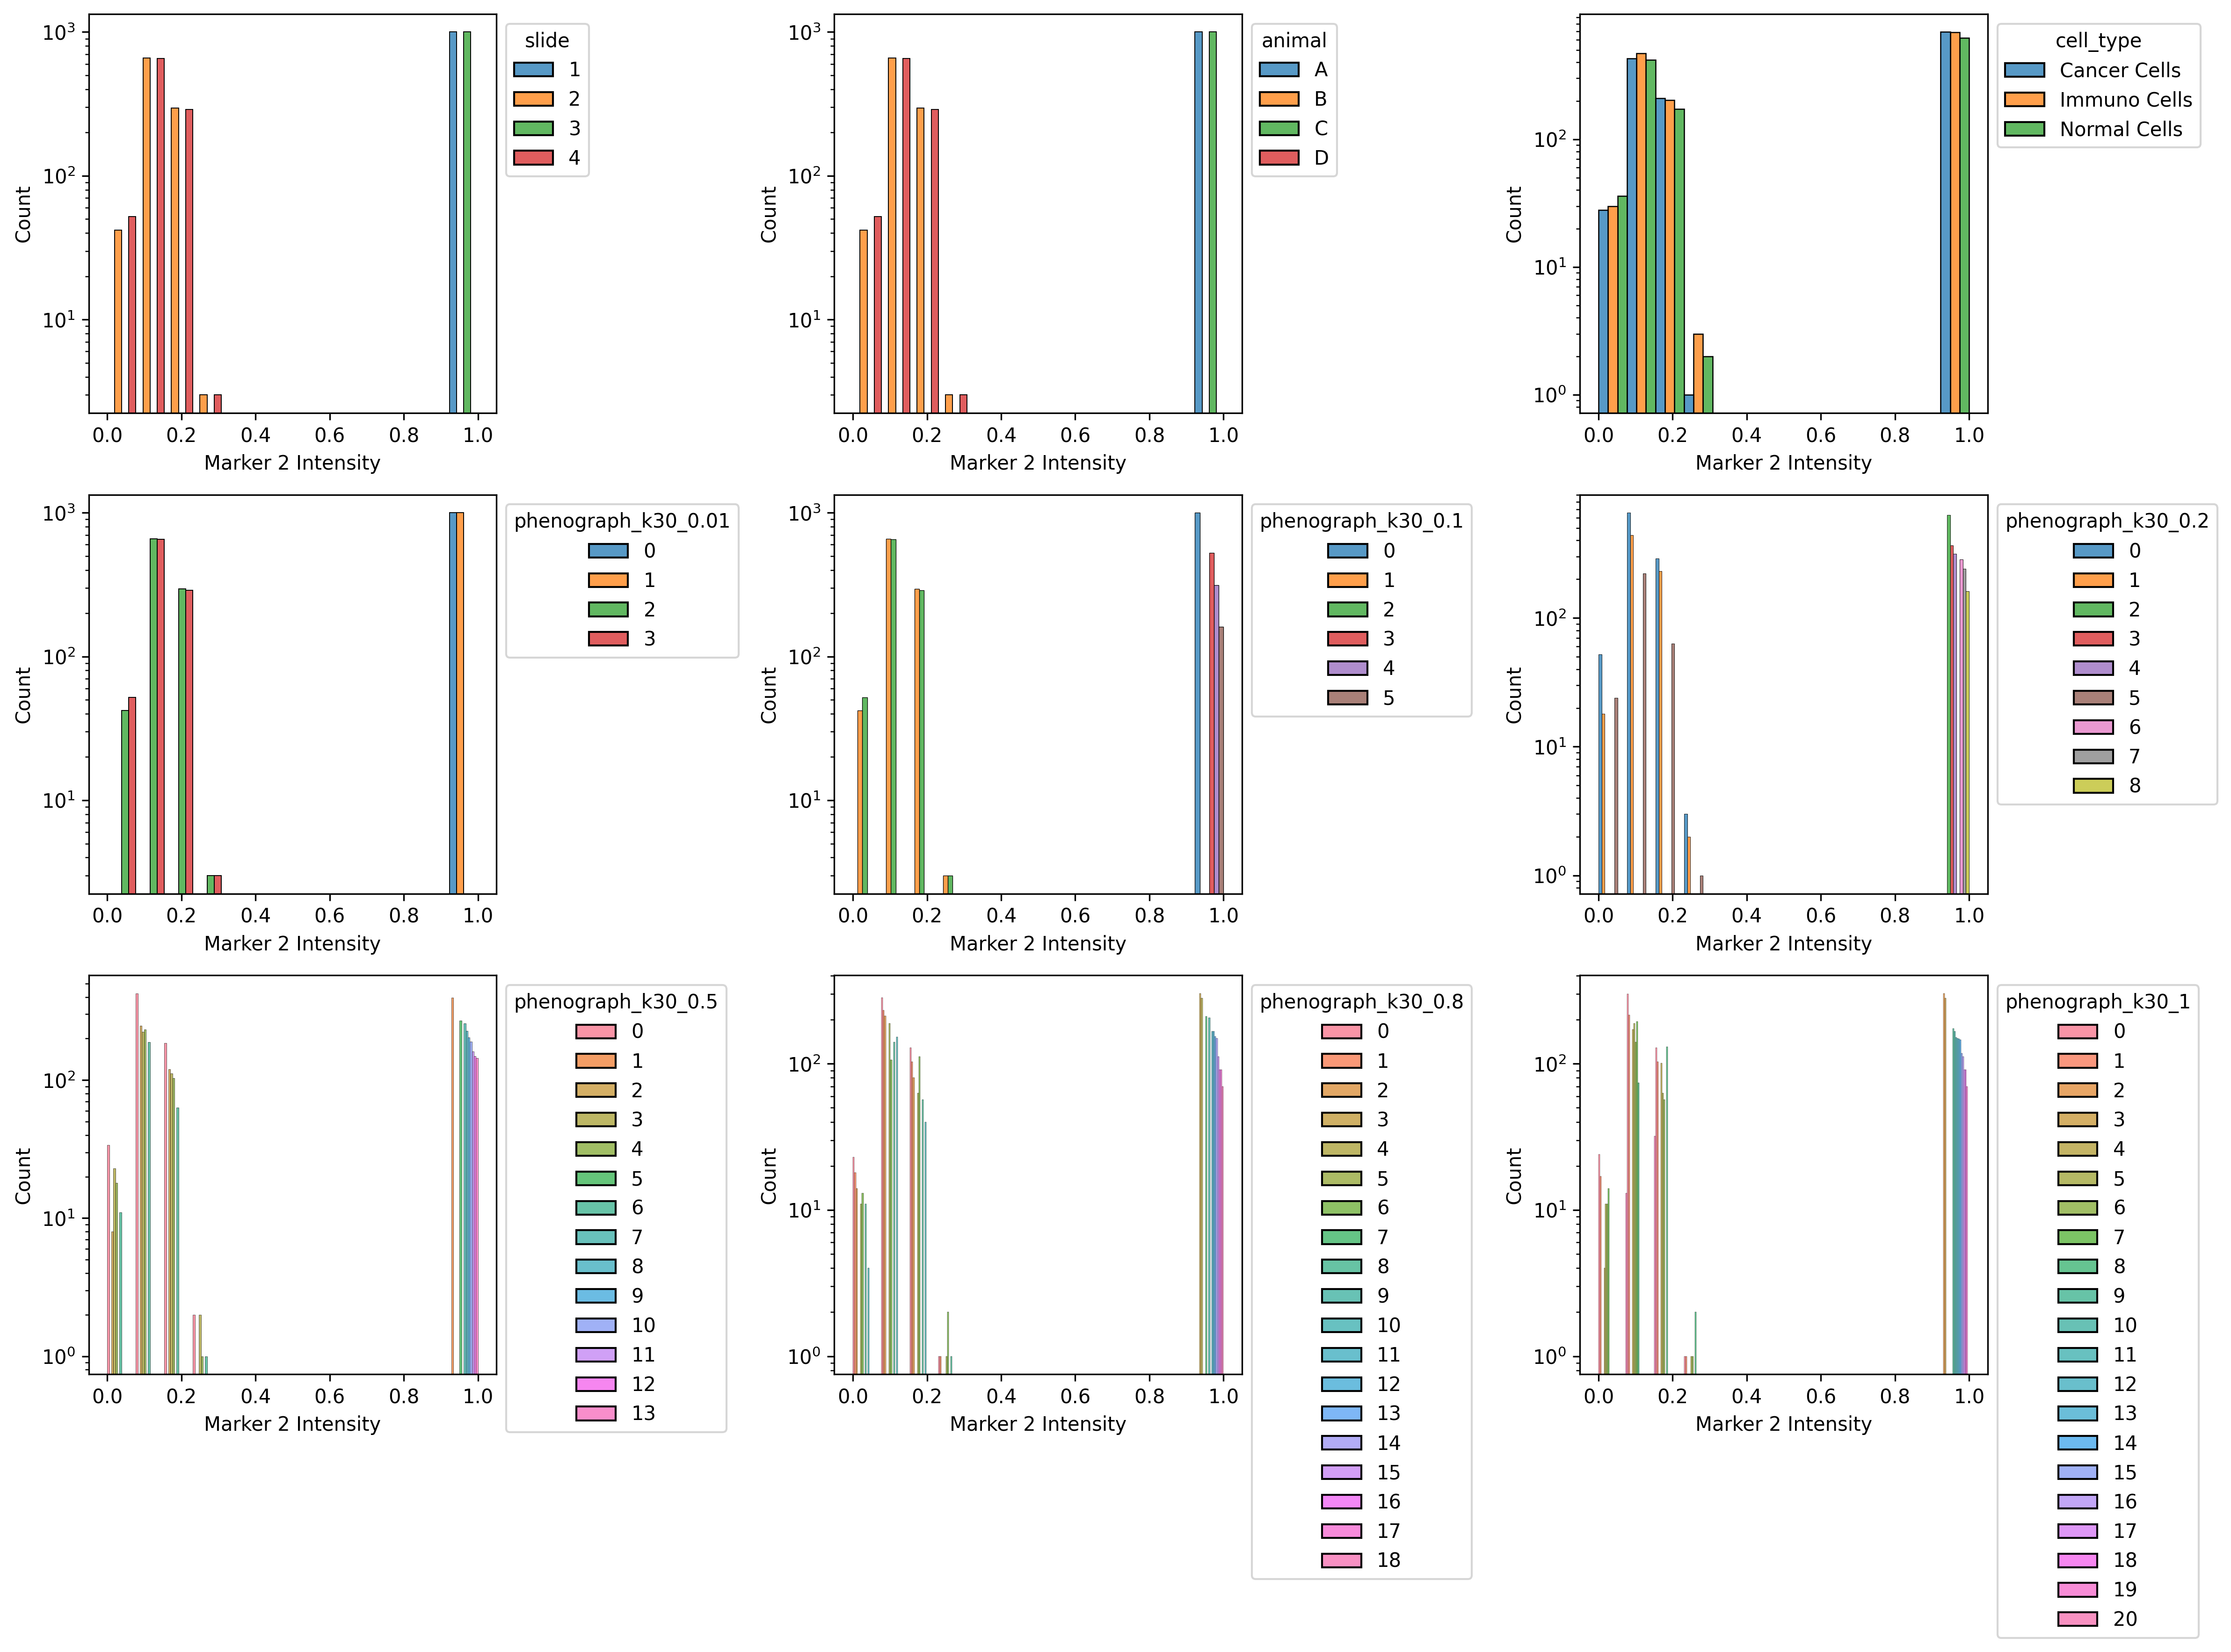

In [20]:
grid_plot_for_hisotmap("Marker 2 Intensity")


#### Marker 3 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


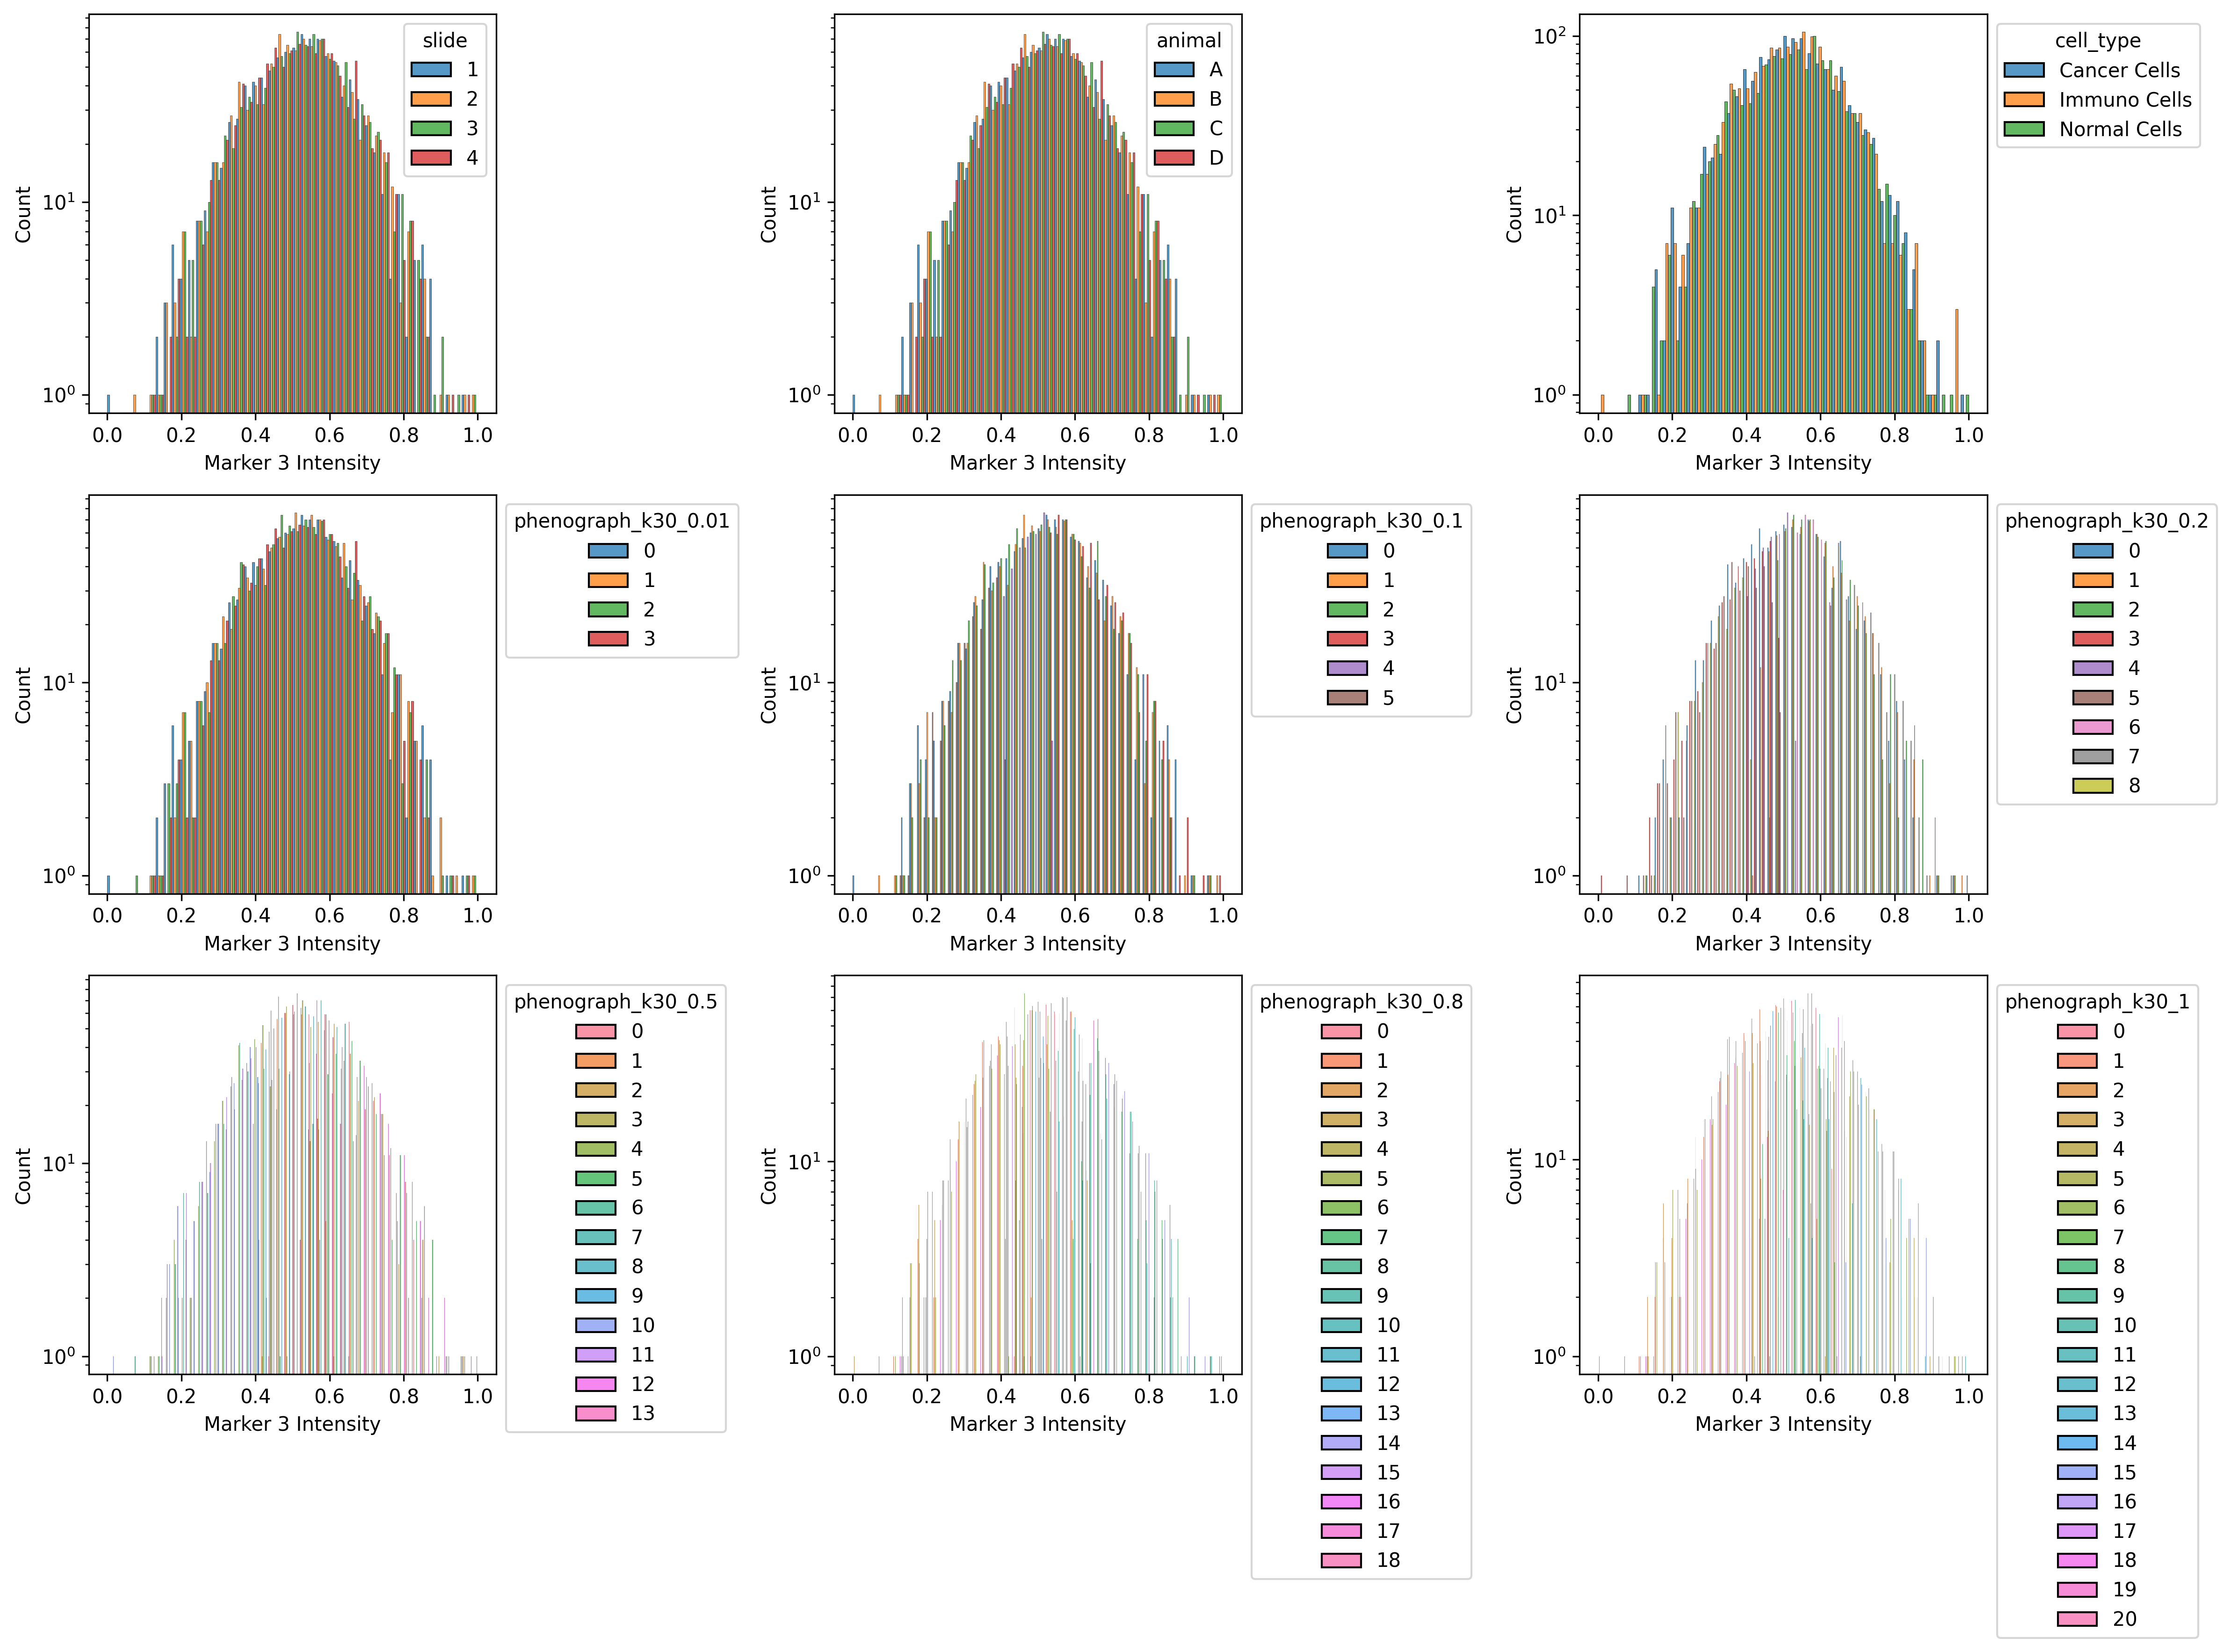

In [21]:
grid_plot_for_hisotmap("Marker 3 Intensity")

### Hierachical Heatmaps

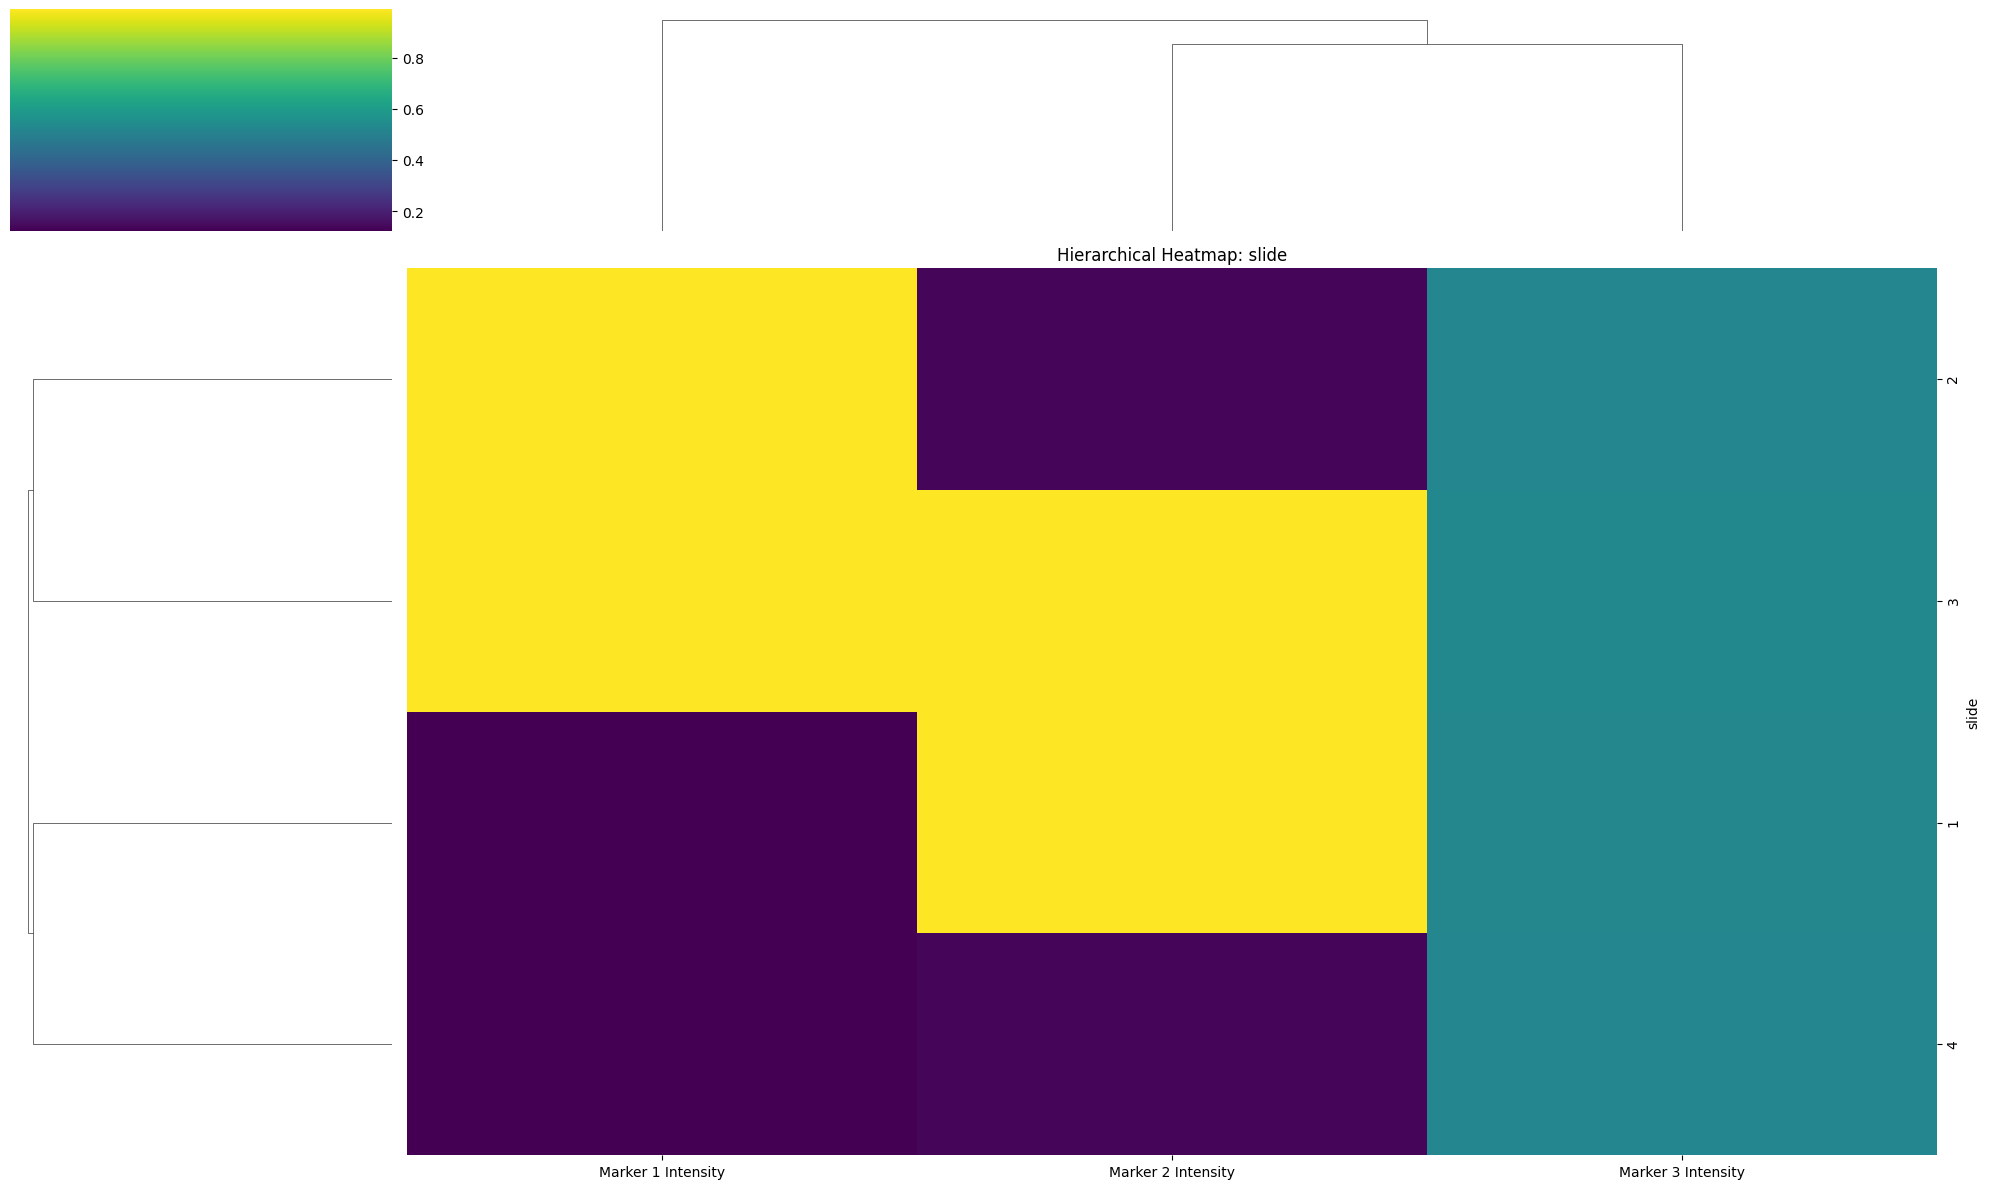

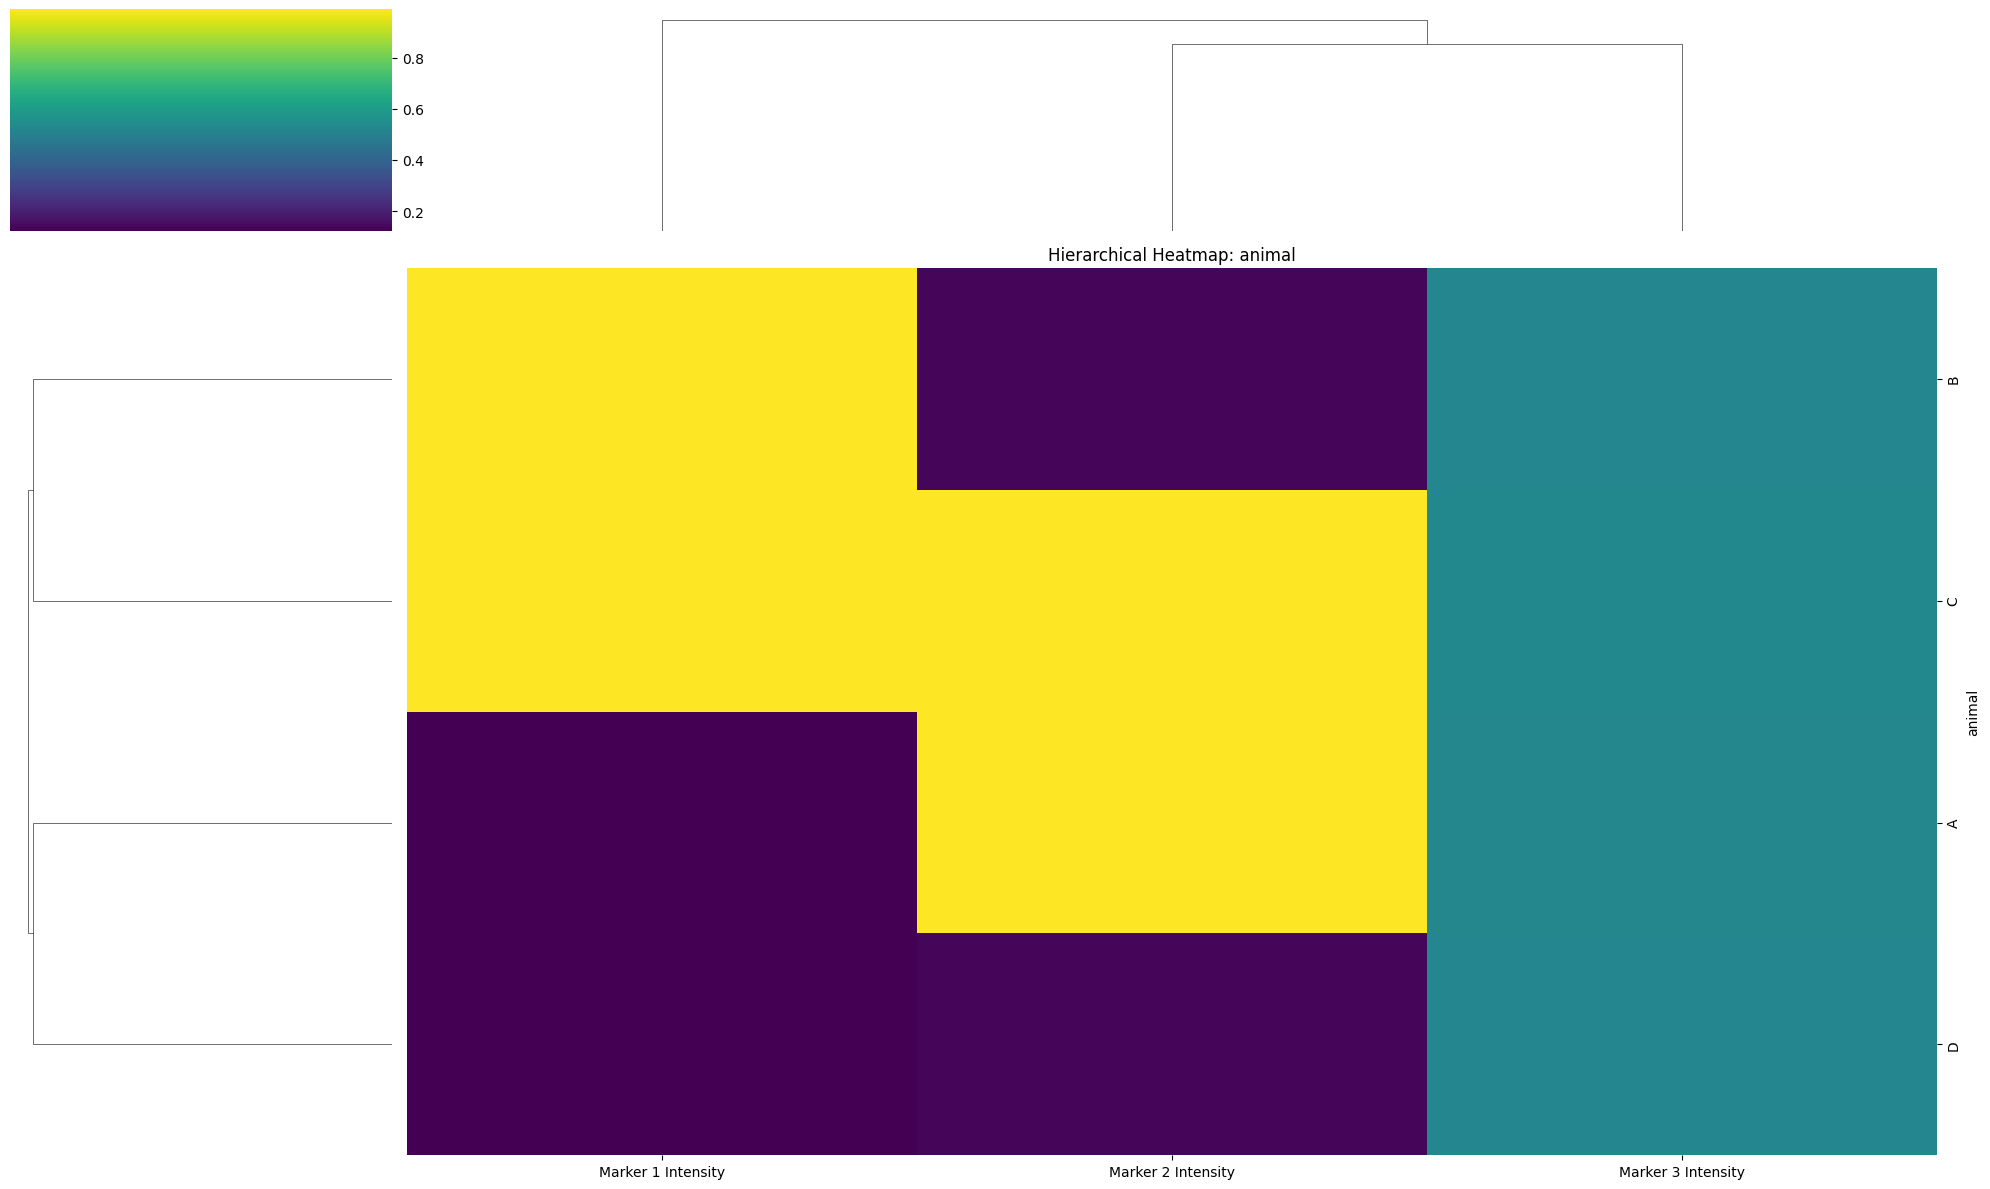

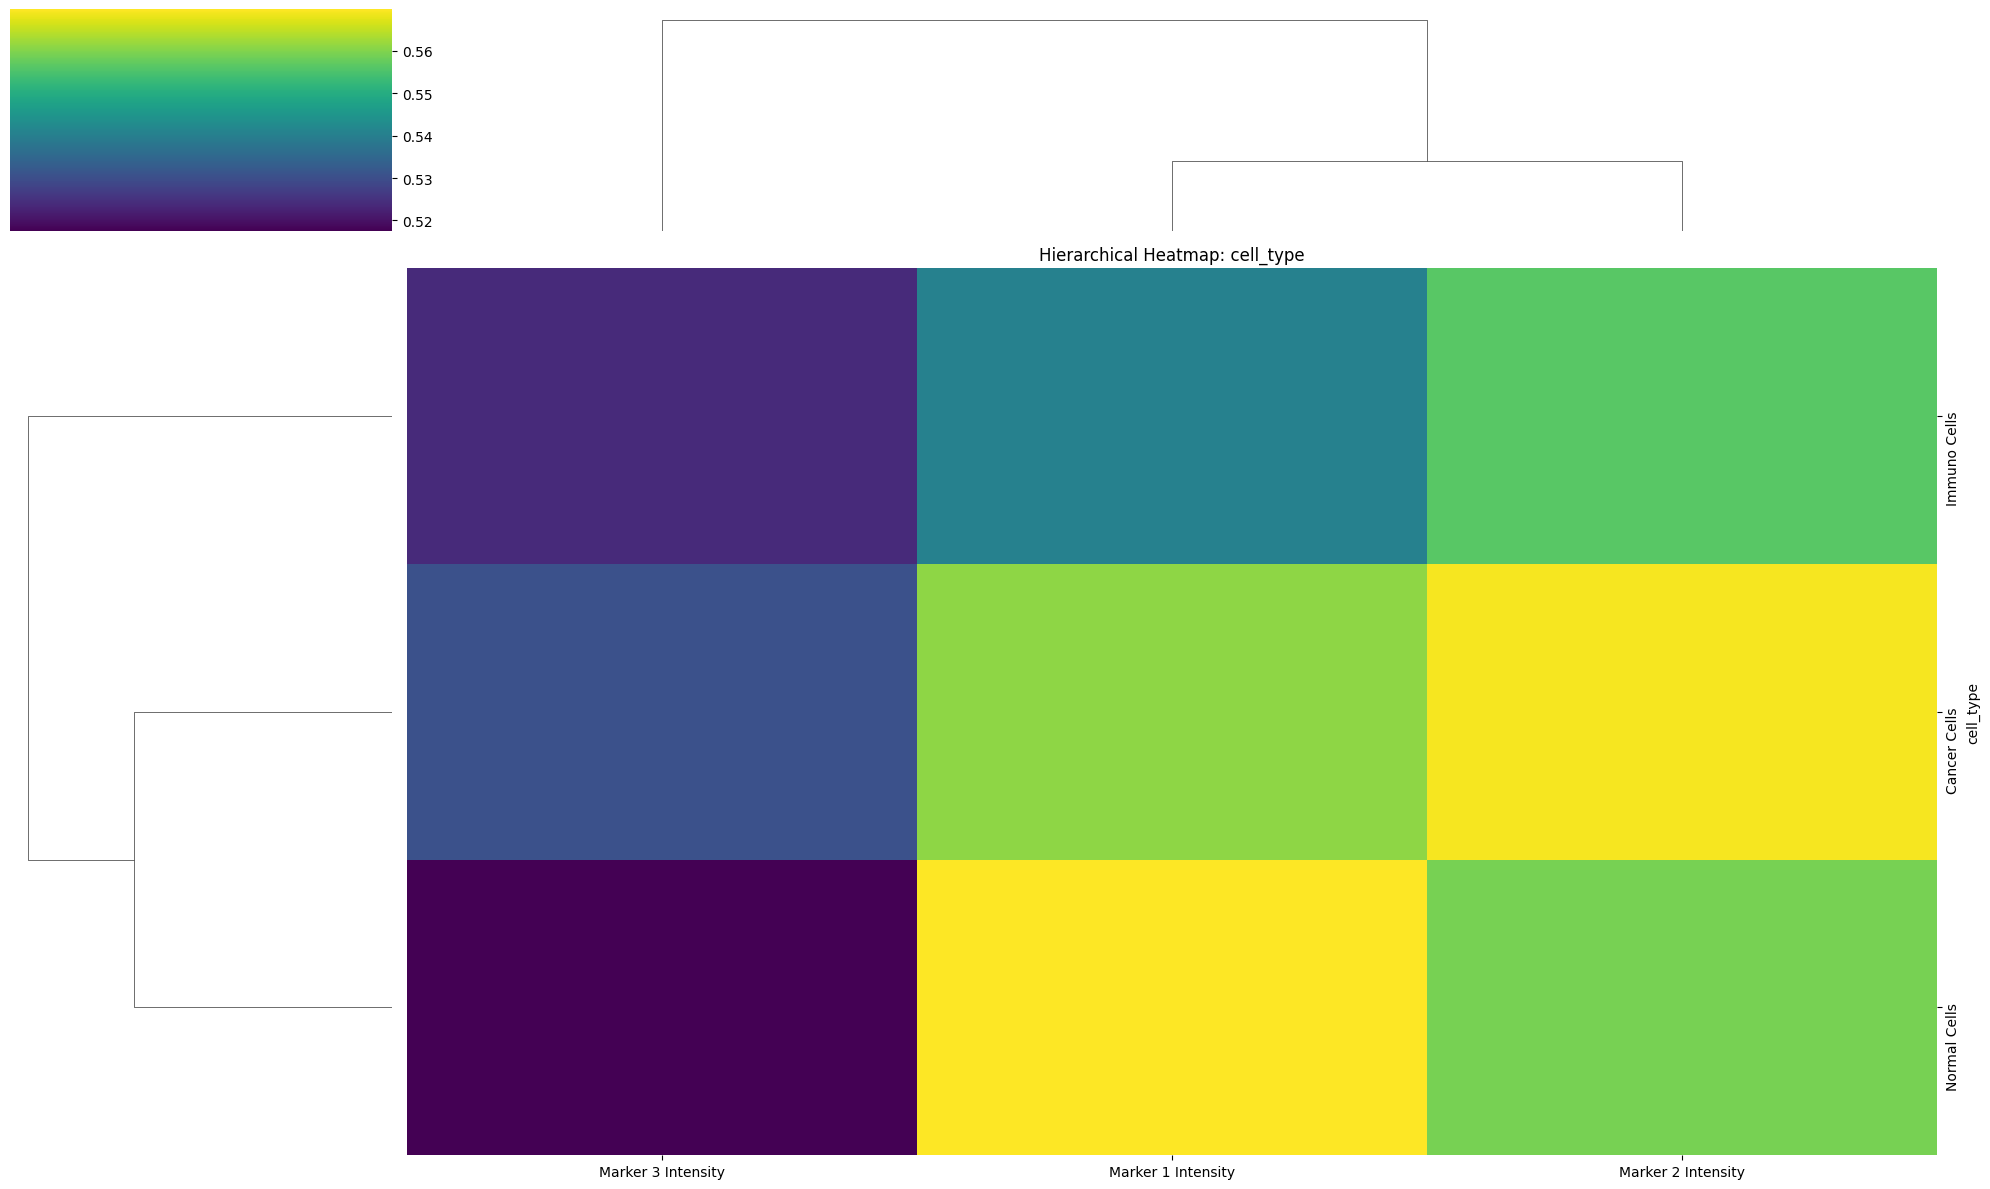

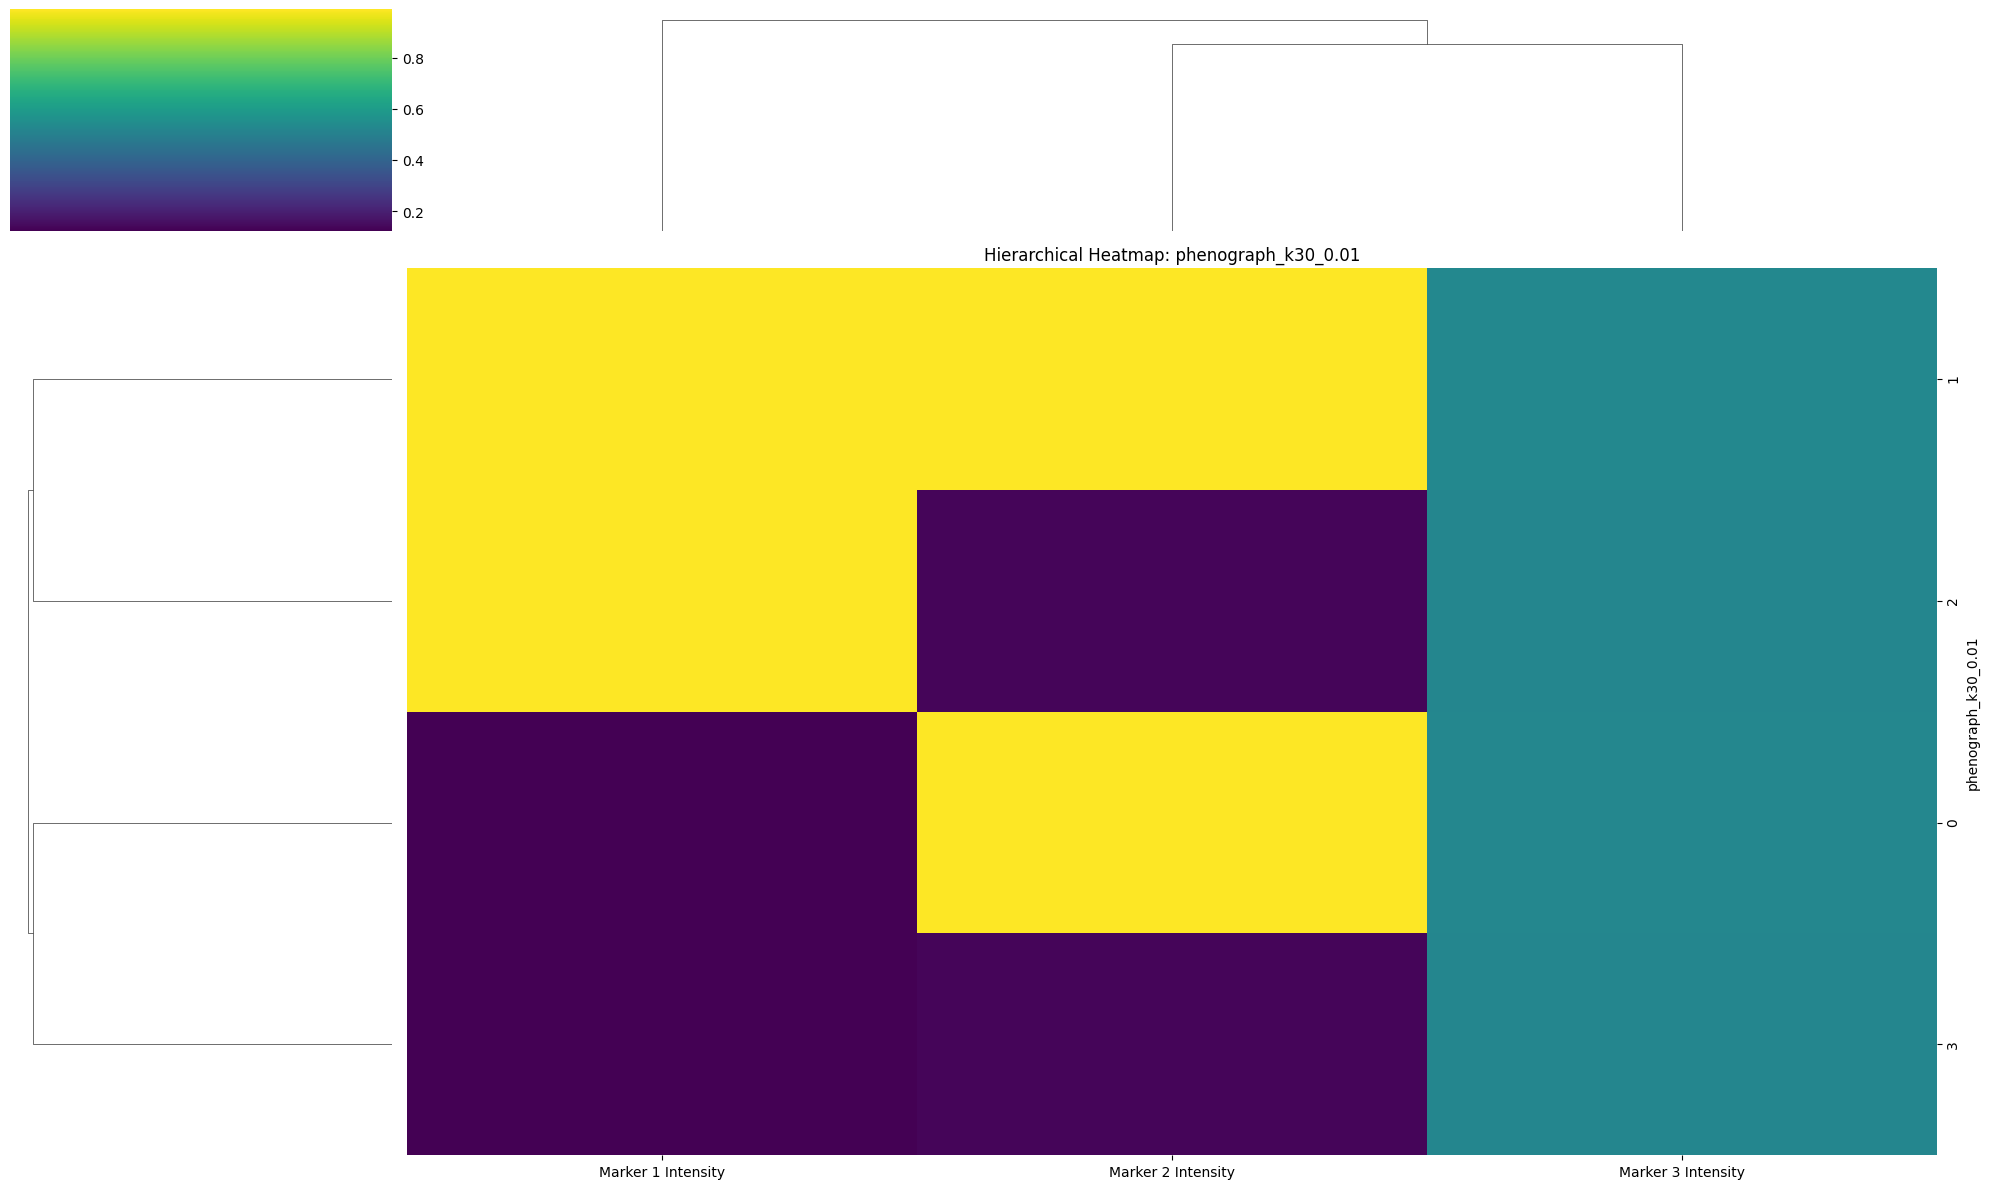

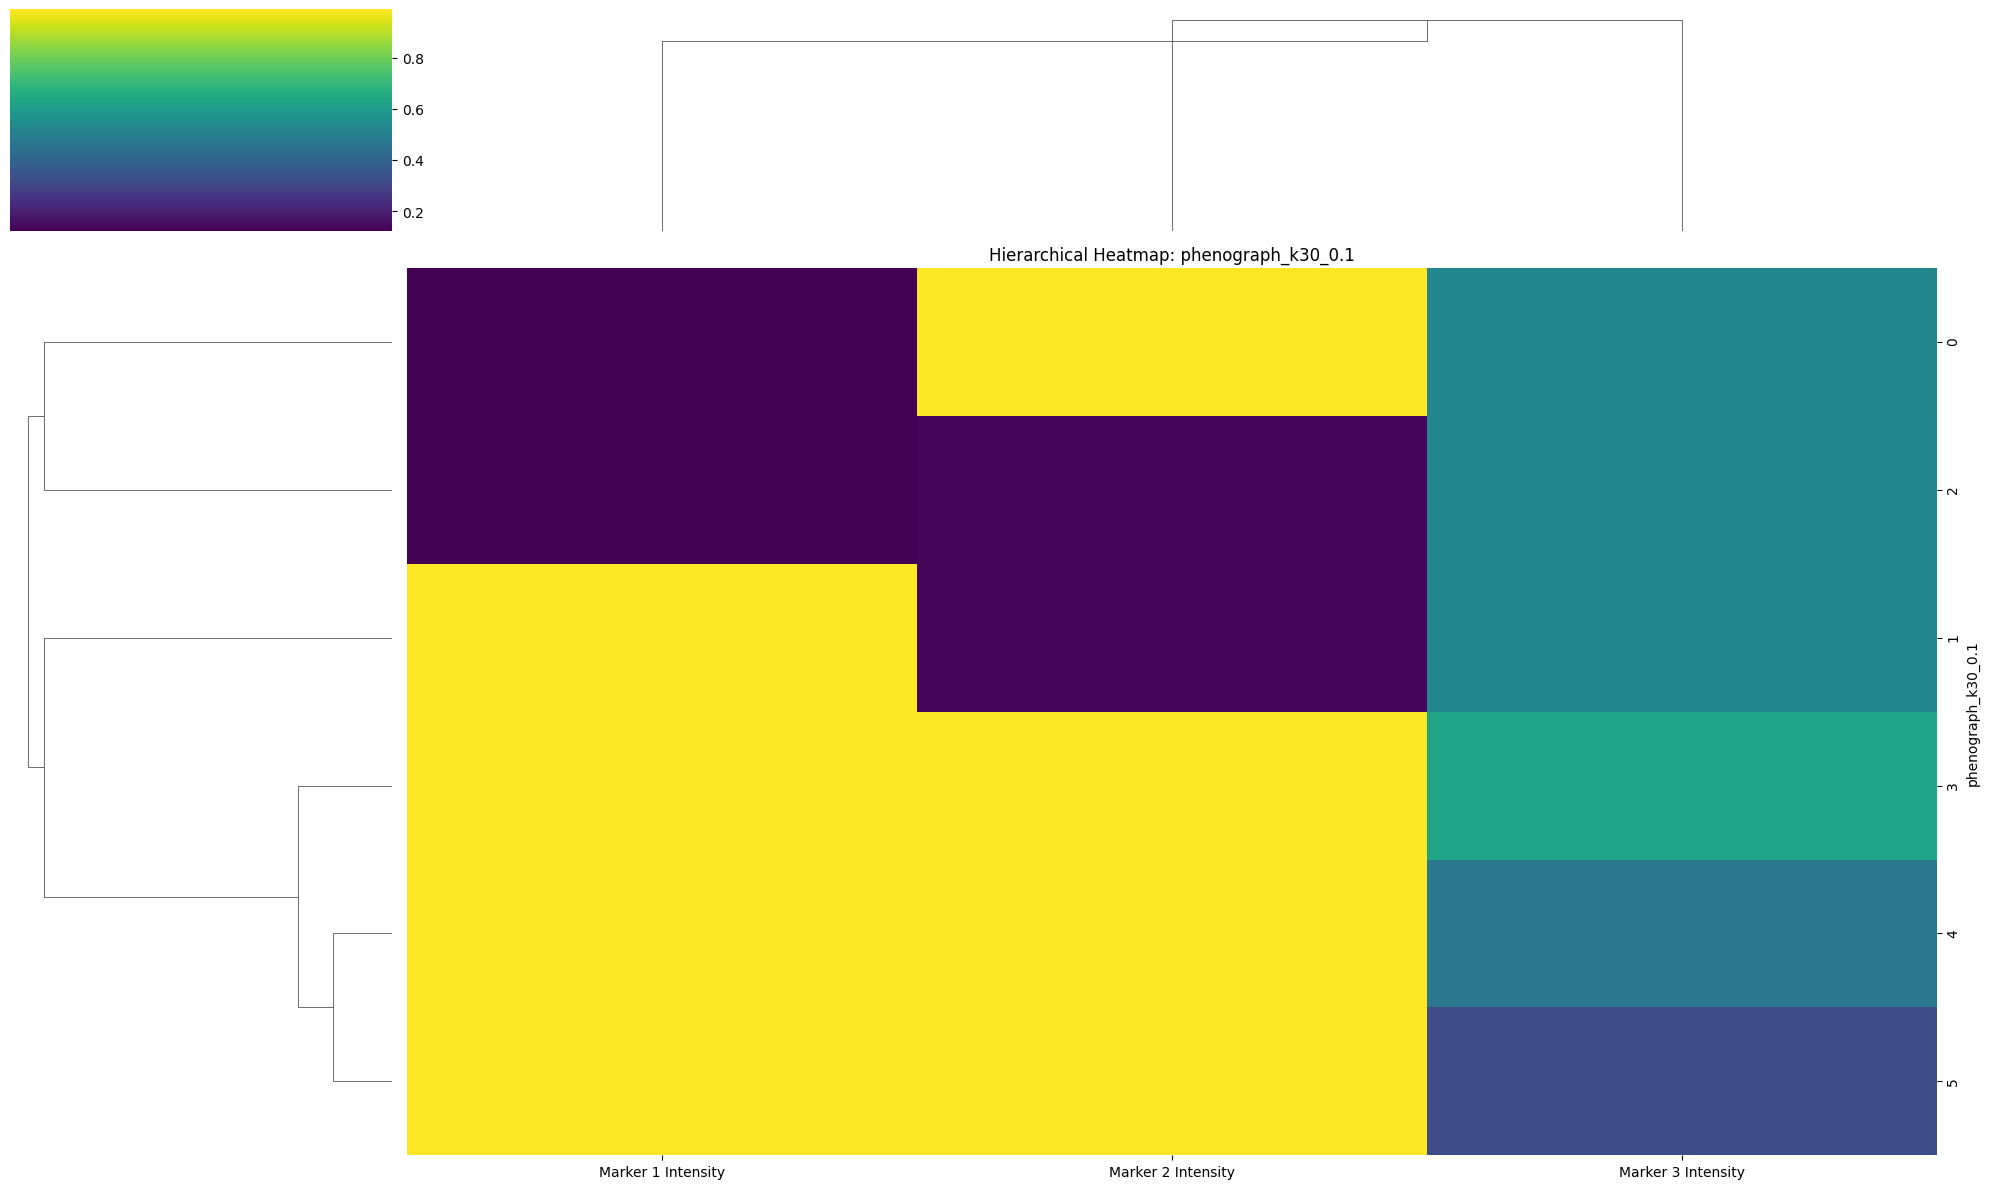

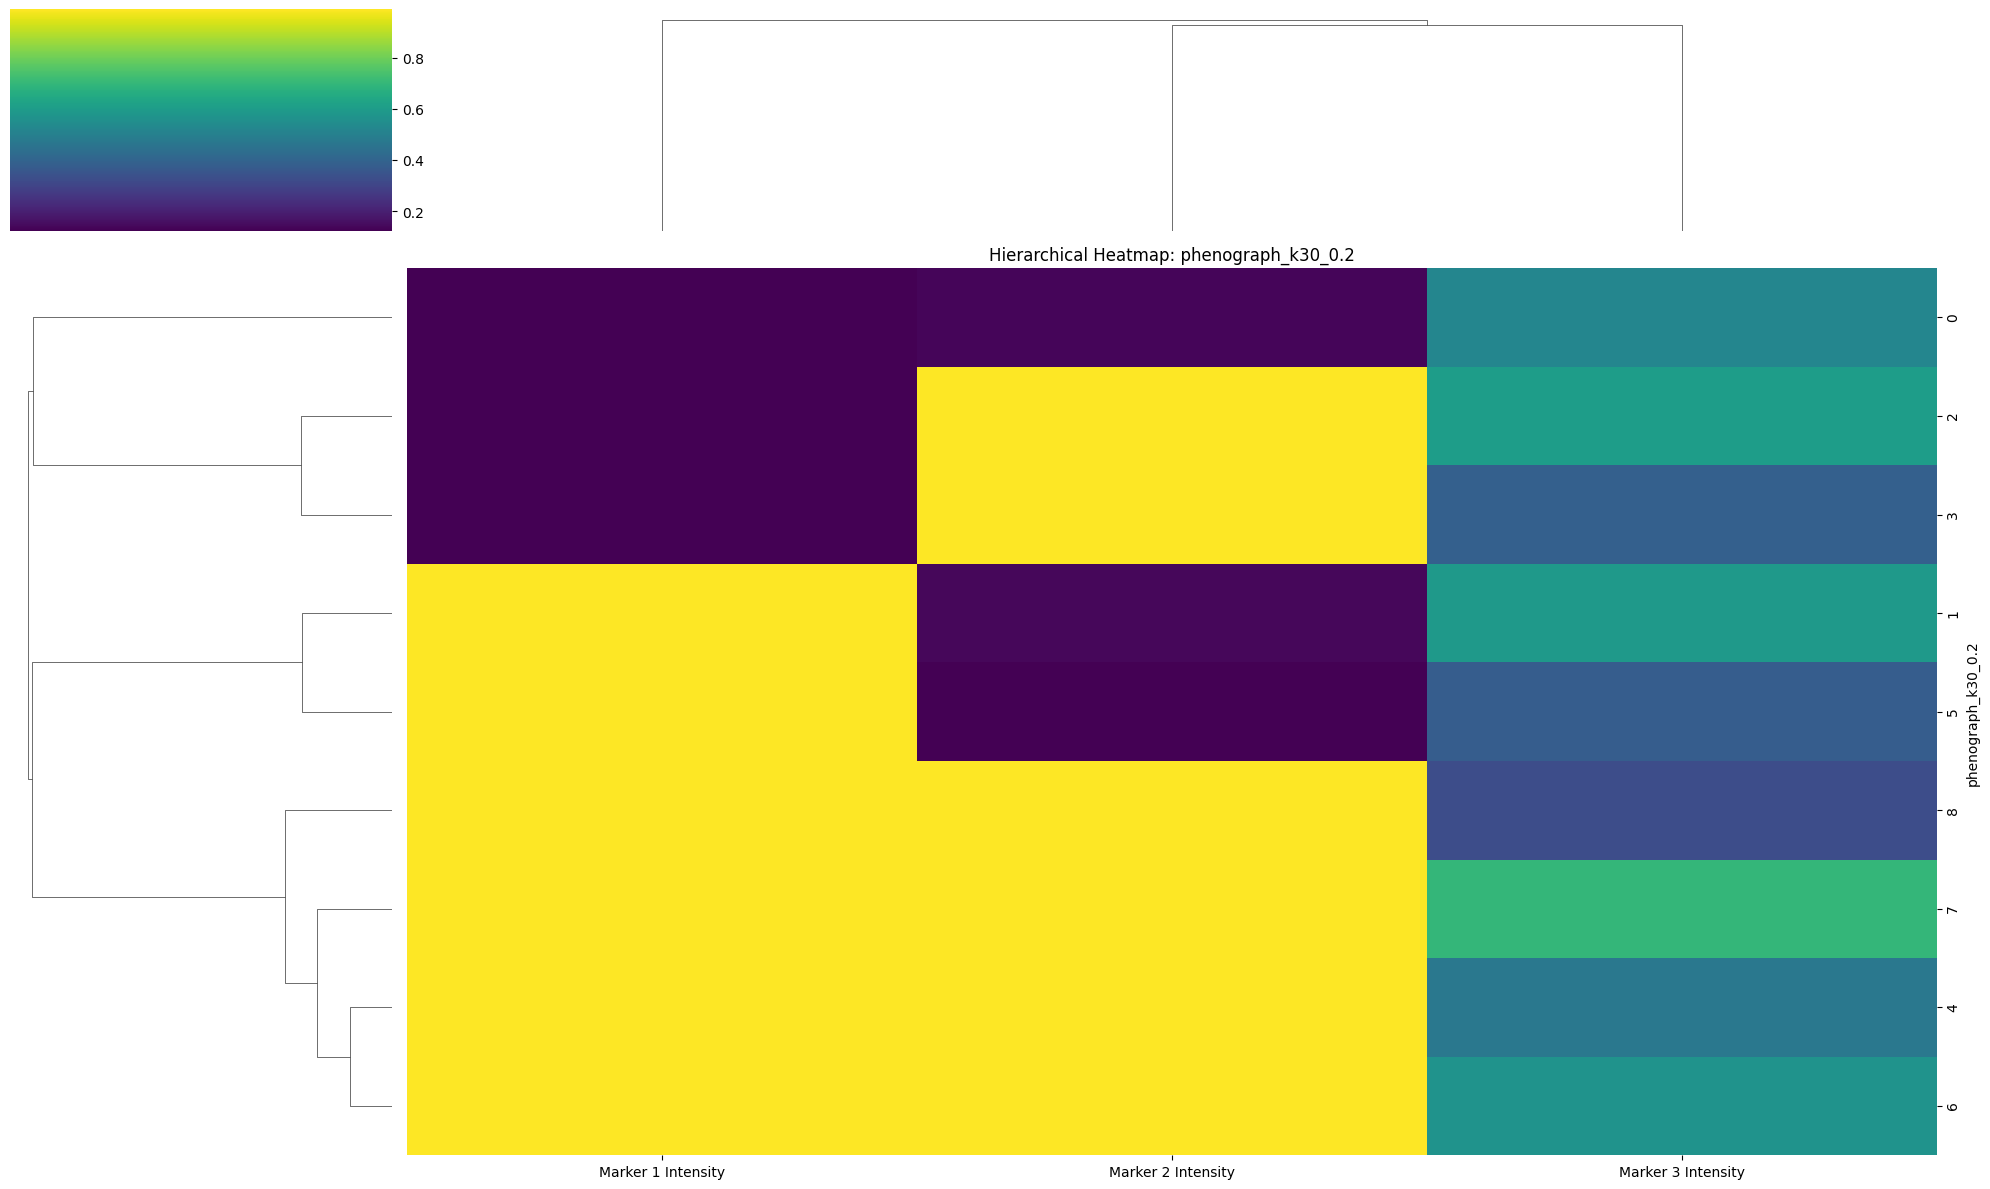

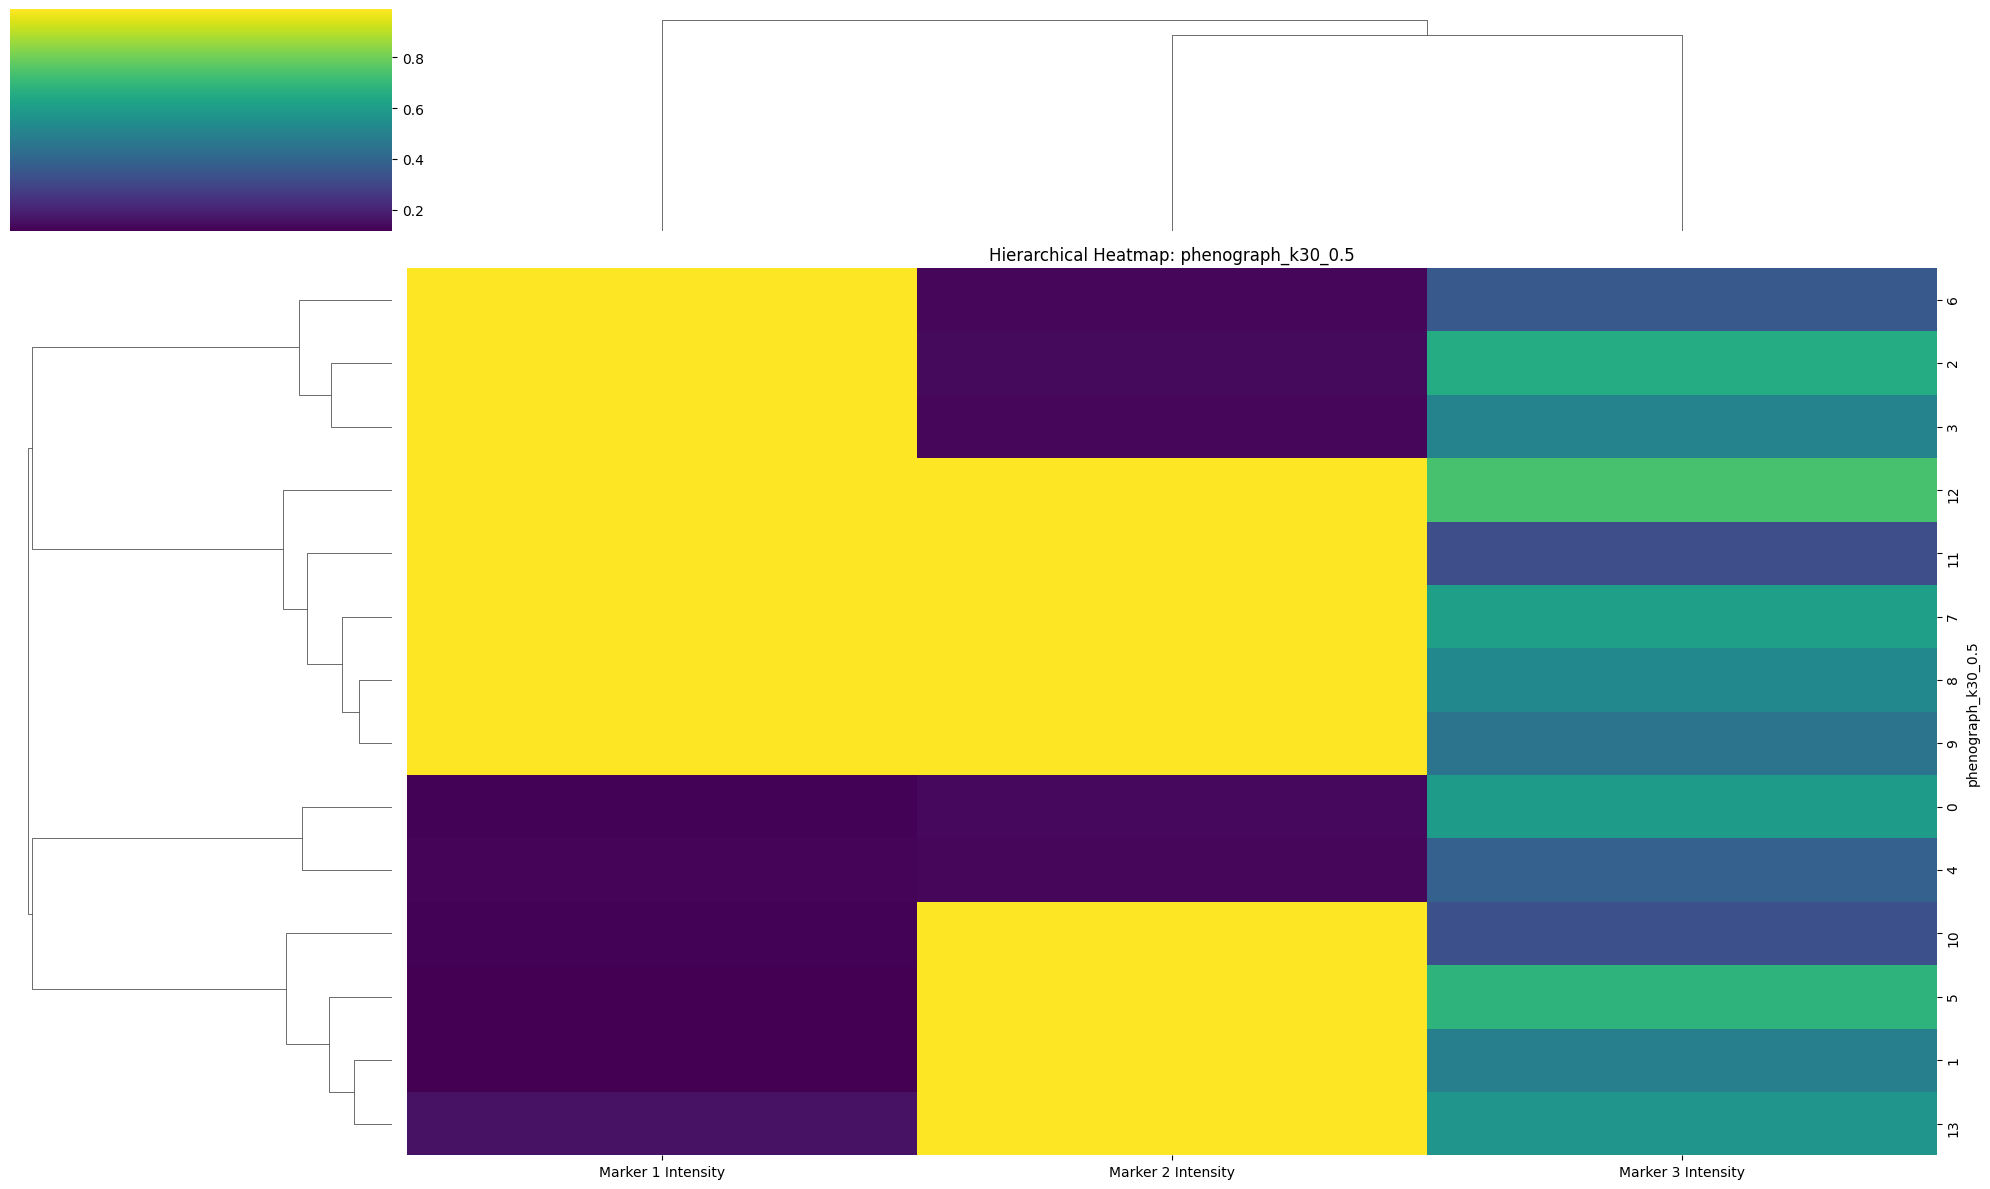

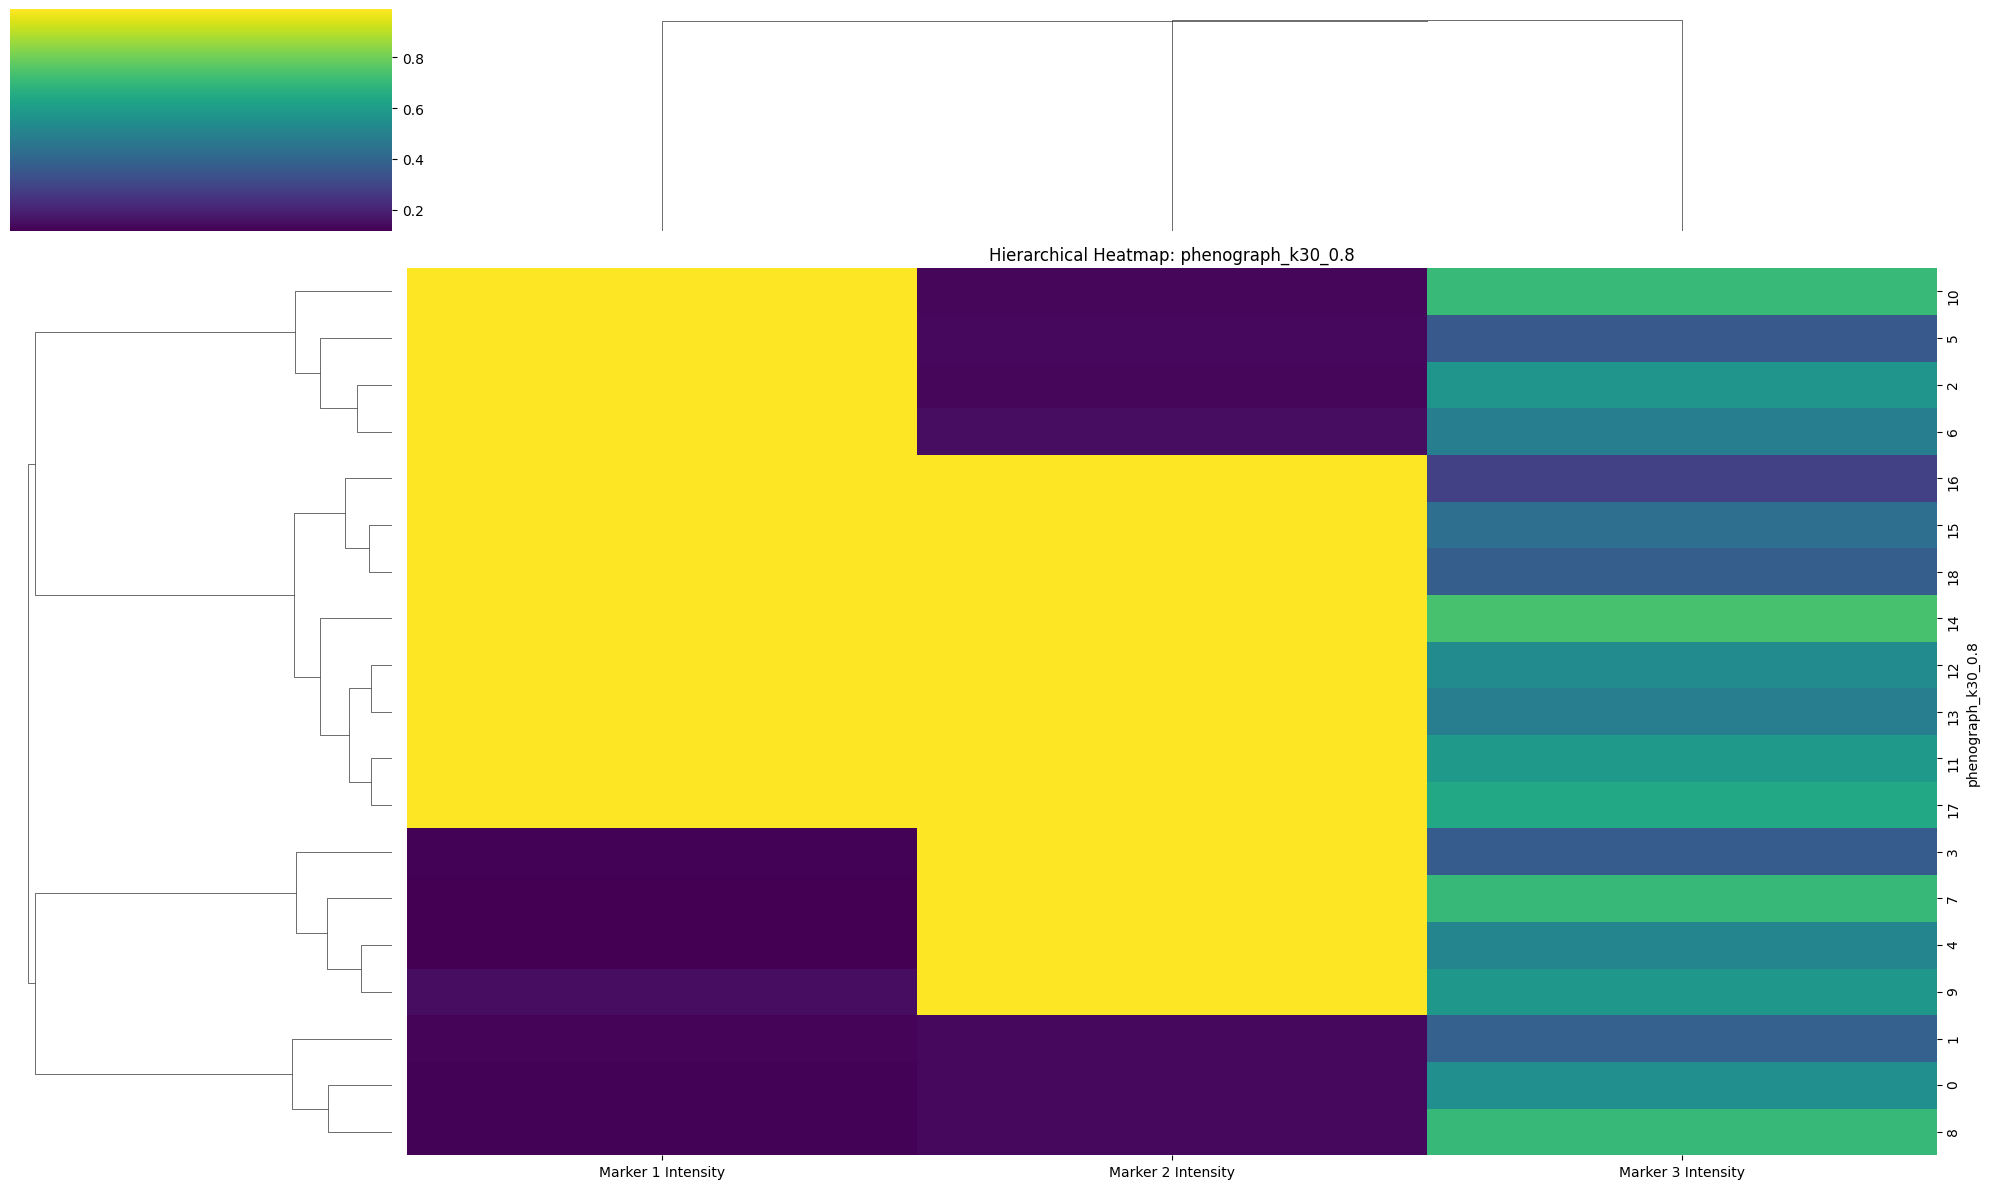

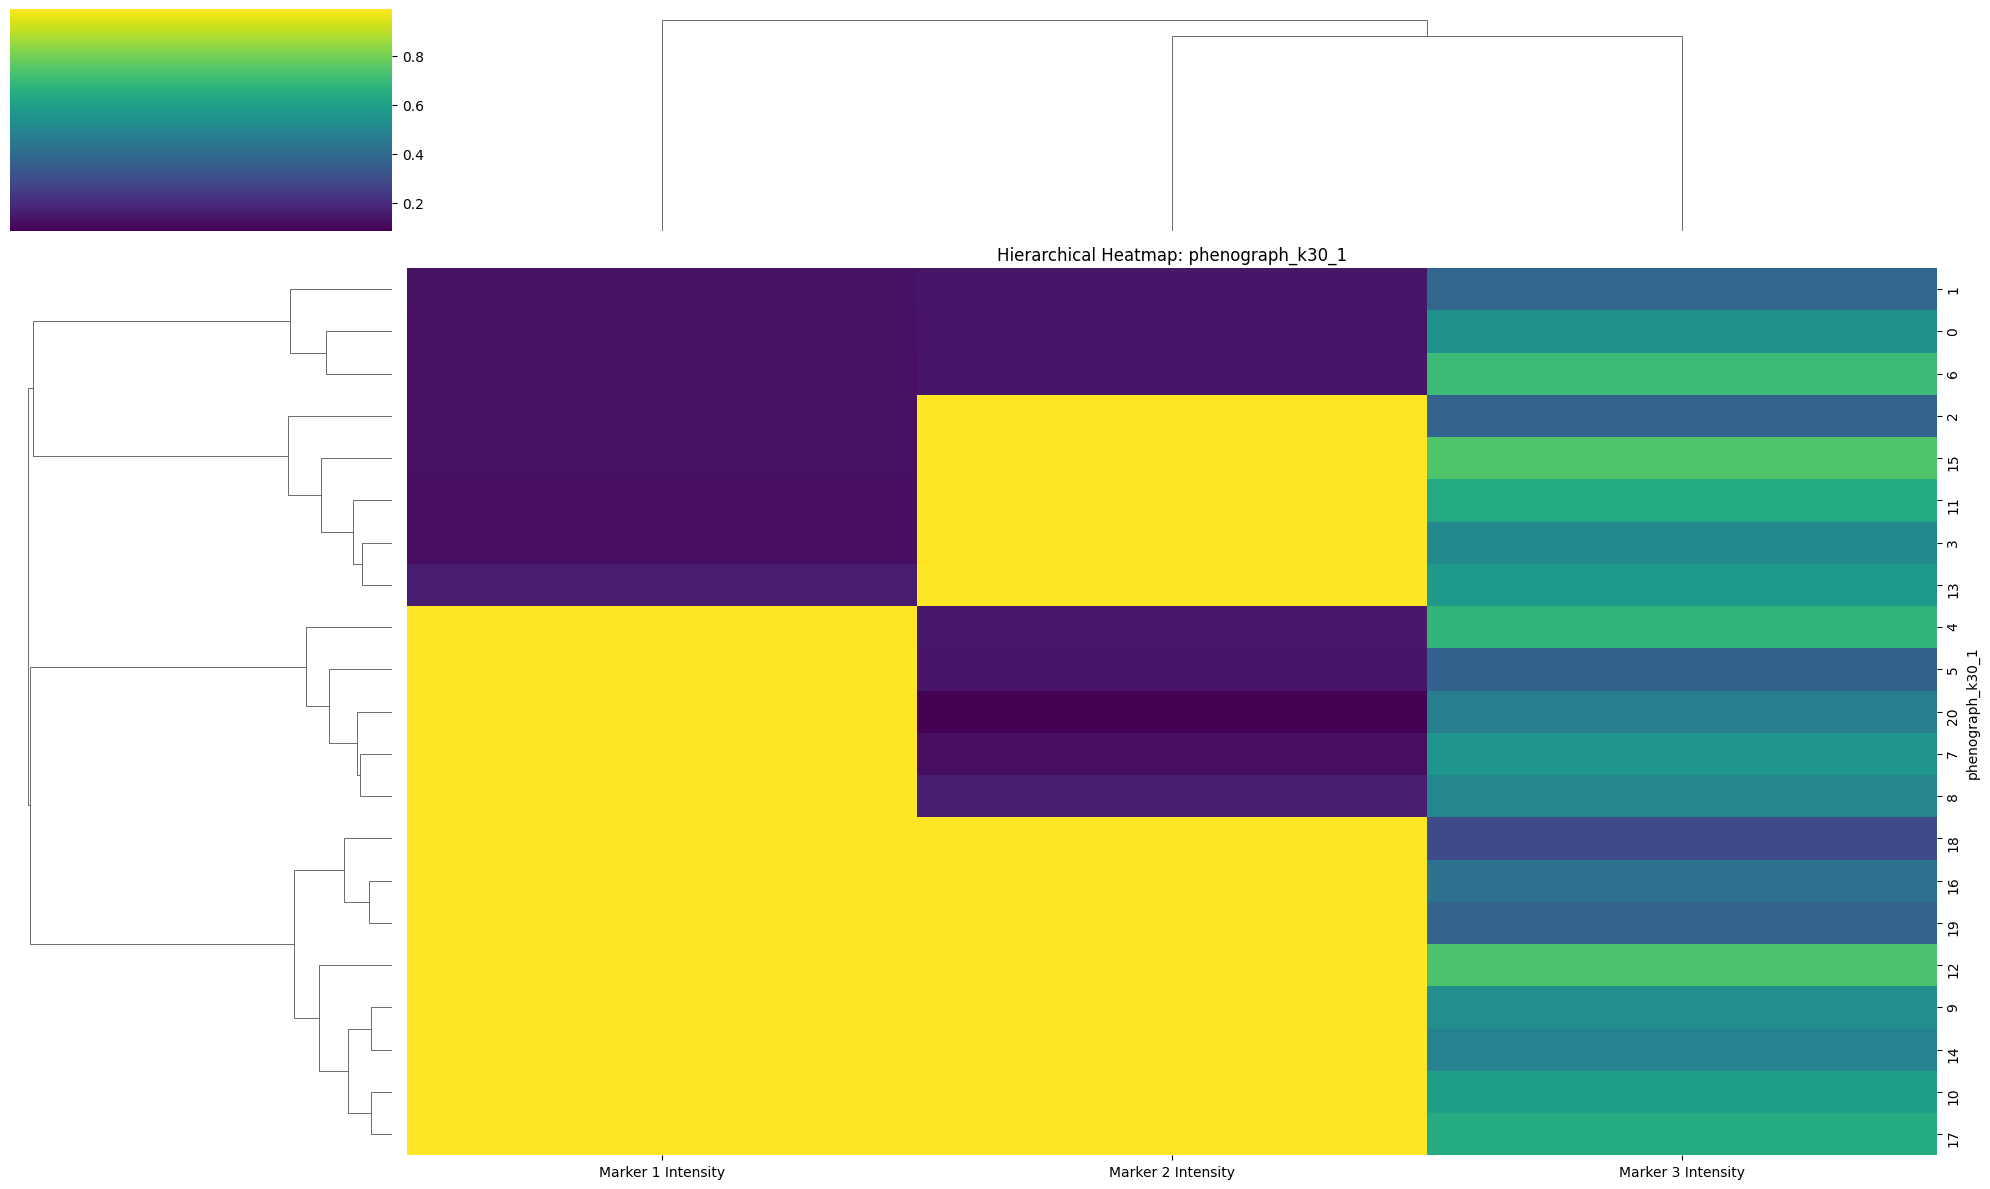

In [22]:
fig_width = 20
fig_height = 12
fig_dpi = 300
layer_to_plot = norm_scaled_output_layer
features = None
standard_scale = None
z_score = None
cluster_feature = True
cluster_annotations = True
Figure_Title = "Hierarchical Heatmap"
font_size = 12
matrix_ratio = 0.1
swap_axes = False
rotate_label = False
r_h_axis_dengrogram =0.2
r_v_axis_dengrogram = 0.2

# Loop through each annotation and create UMAP plots
for i, annotation in enumerate(annotations):
    _, clustergrid, _ = hierarchical_heatmap(
        adata, 
        annotation=annotation,
        features=features, 
        layer=layer_to_plot,
        cluster_feature=cluster_feature,
        cluster_annotations=cluster_annotations,
        standard_scale=standard_scale,
        z_score=z_score,
        swap_axes=swap_axes,
        rotate_label=rotate_label,
        figsize=(fig_width,fig_height),
        dendrogram_ratio=(r_h_axis_dengrogram,r_v_axis_dengrogram)
    )

    clustergrid.ax_heatmap.set_title(f'{Figure_Title}: {annotation}', fontsize=font_size)
    clustergrid.height = fig_height*matrix_ratio
    clustergrid.width = fig_width*matrix_ratio

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()


### Spatial Plots
NOTE: Odd error observed about the spatial plot function.
This function worked on NIDAP though...

AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type', 'phenograph_k30_0.01', 'phenograph_k30_0.1', 'phenograph_k30_0.2', 'phenograph_k30_0.5', 'phenograph_k30_0.8', 'phenograph_k30_1'
    uns: 'phenograph_features'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_norm', 'arcsinh_scaled'
None


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

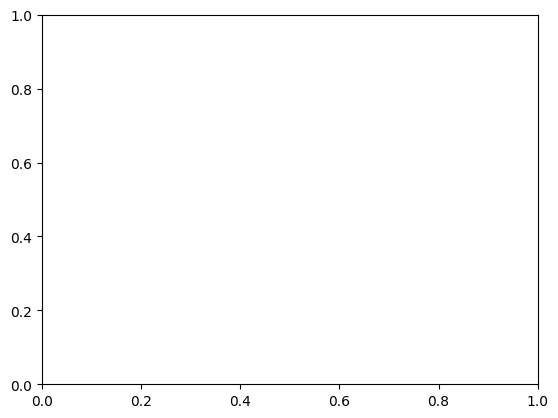

In [23]:
feature = None

layer = norm_scaled_output_layer

alpha = 0.5
spot_size = 10

font_size = 12
vmin = 999
vmax = -999
print(adata)

spatial_plot(
    adata=adata,
    layer='arcsinh_scaled',
    spot_size=spot_size,
    alpha=alpha,
    annotation="animal"
)

This is the equivalent with plain sptial plot

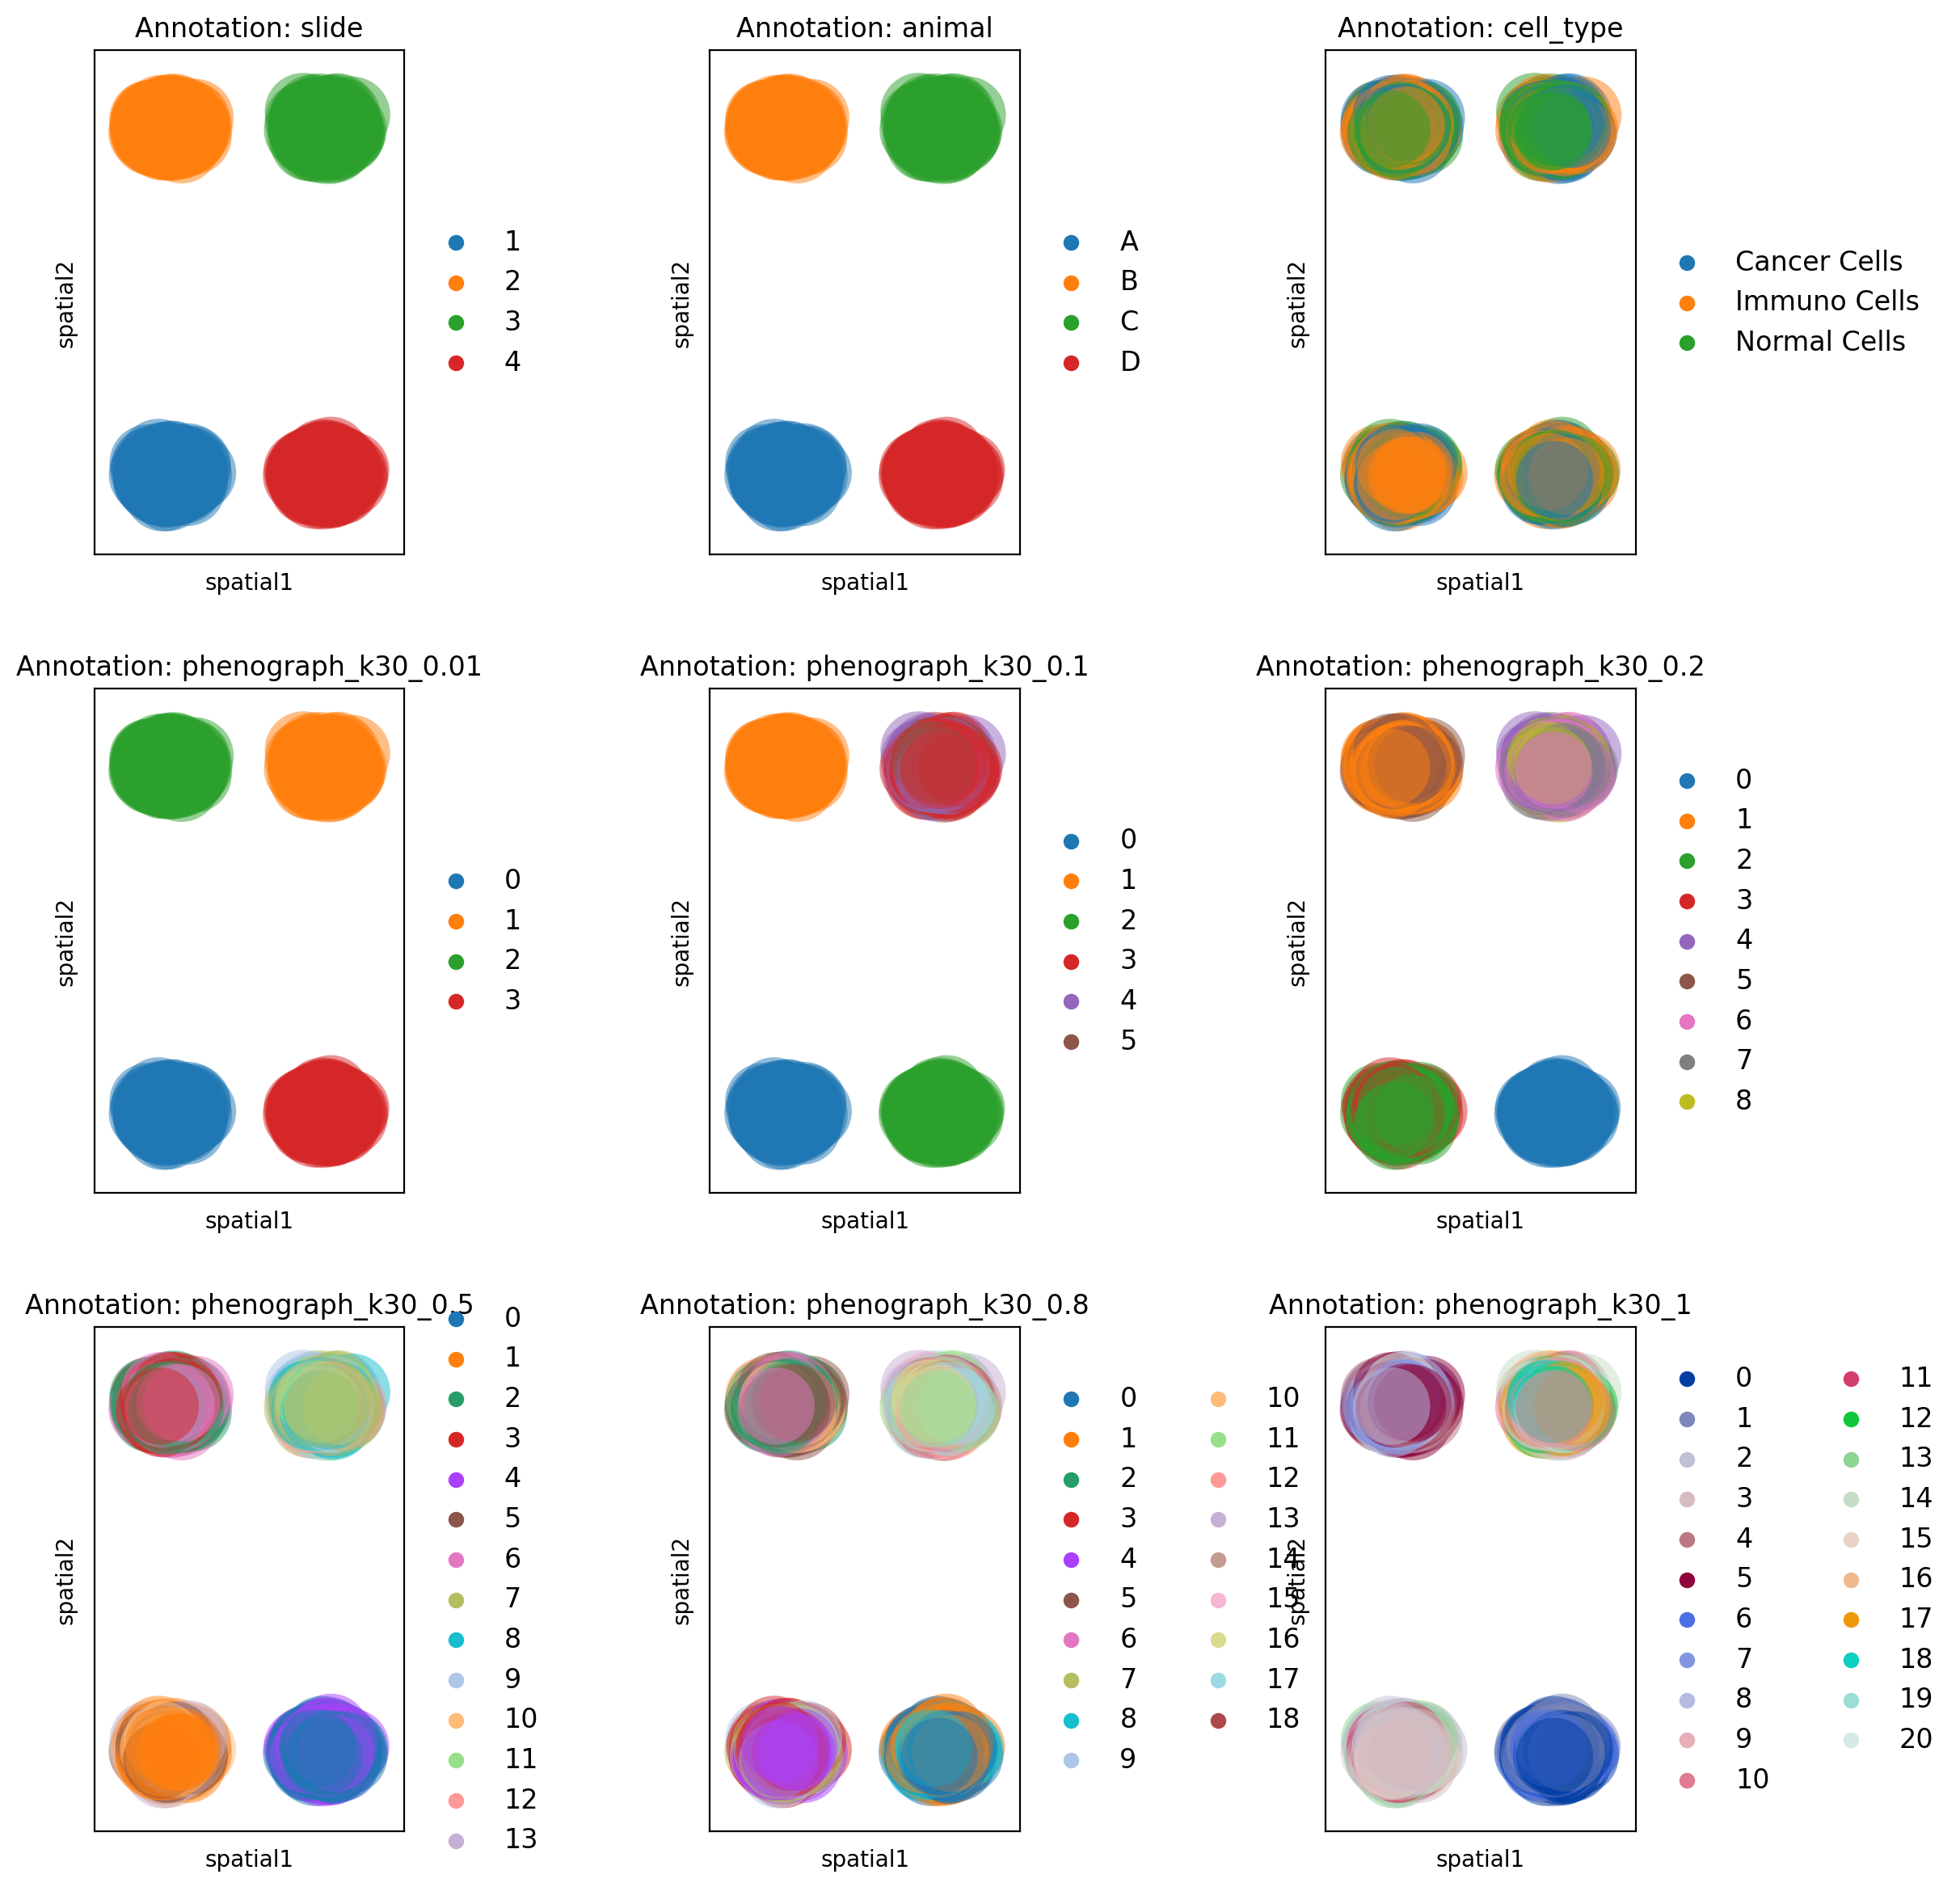

In [24]:
import matplotlib.pyplot as plt

def grid_plot_for_spatial_plot(adata, annotations, norm_scaled_output_layer):
    image_height = 12 
    image_width = 12
    dpi = 200

    # Calculate number of rows and columns
    n_annotations = len(annotations)
    n_cols = ceil(sqrt(n_annotations))
    n_rows = ceil(n_annotations / n_cols)

    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(image_width, image_height), dpi=dpi)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through each annotation and create spatial plots
    for i, annotation in enumerate(annotations):
        ax = axes[i]

        # Default settings for the spatial plot
        alpha = 0.5
        spot_size = 10
        font_size = 12
        vmin = 999
        vmax = -999

        plt.rcParams['font.size'] = font_size

        try:
            # Plot the spatial data
            sc.pl.spatial(
                adata=adata,
                layer=None,
                color=annotation,
                spot_size=spot_size,
                alpha=alpha,
                vmin=vmin,
                vmax=vmax,
                ax=ax,
                show=False
            )

            ax.set_title(f'Annotation: {annotation}', fontsize=font_size)
        
        except ValueError as e:
            print(f"Error plotting {annotation}: {e}")
            ax.set_visible(False)  # Hide this subplot if there's an error

    # Hide any unused subplots (if any)
    for i in range(n_annotations, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
annotations = adata.obs.columns.tolist()  # Replace with your actual annotations
grid_plot_for_spatial_plot(adata, annotations, norm_scaled_output_layer="arcsinh_scaled")



### Interactive Spatial Plot

In [31]:
def interactive_plot_template(annotations):
    dot_size = 1.5
    dot_transparentcy = 0.75
    color_map = "Viridis"
    desired_width_in = 2
    desired_height_in = 2
    dpi = 200
    Font_size = 12

    ##--------------- ##
    ## Error Messages ##
    ## -------------- ##

    ## --------- ##
    ## Functions ##
    ## --------- ##


    ## --------------- ##
    ## Main Code Block ##
    ## --------------- ##
    ################################
    # Show the combined figure

    main_fig = interative_spatial_plot(
        adata,
        annotations=annotations,
        dot_size=dot_size,
        dot_transparancy=dot_transparentcy,
        colorscale=color_map,
        figure_width=desired_width_in,
        figure_height=desired_height_in,
        figure_dpi=dpi,
        font_size=Font_size
    )

    # Create a new trace for the selected points
    main_fig_copy = copy.copy(main_fig)
    datas = main_fig_copy.data
    main_fig.data = []
    # print(main_fig.data)
    updated_index = []

    legend_list = []
    for item in range(len(annotations)):
        if item == 0:
            legend_list.append("legend")
        else:
            legend_list.append("legend" + str(item+1))      

    previous_group = None
    # Assuming you have a list of indices
    indices = list(range(len(datas)))
    for item in indices:
        cat_label =datas[item]['customdata'][0][0]
        cat_dataset = pd.DataFrame({
            'X': datas[item]['x'],
            'Y': datas[item]['y']
        })
        
        for i, legend_group in enumerate(annotations):
            if cat_label.startswith(legend_group):
                cat_leg_group = f"<b>{legend_group}</b>"
                cat_label = cat_label[len(legend_group) + 1:]
                cat_group = legend_list[i]

        if previous_group is None:
            previous_group = cat_group
            main_fig.add_trace(go.Scattergl(
                x=[datas[item]['x'][0]],
                y=[datas[item]['y'][0]],
                name=cat_leg_group,
                mode="markers",
                showlegend=True,
                marker=dict(
                    color="white",
                    colorscale=None,
                    size=0,
                    opacity=0
                )
            ))  
        if cat_group != previous_group:
            main_fig.add_trace(go.Scattergl(
                x=[datas[item]['x'][0]],
                y=[datas[item]['y'][0]],
                name=cat_leg_group,
                mode="markers",
                showlegend=True,
                marker=dict(
                    color="white",
                    colorscale=None,
                    size=0,
                    opacity=0
                )
            ))  
            previous_group = cat_group
        

        # print(f"{cat_label} : {cat_group}")
        
        cat_dataset['label'] = cat_label
                
        main_fig.add_trace(go.Scattergl(
            x=cat_dataset['X'],
            y=cat_dataset['Y'],
            name=cat_label,
            mode="markers",
            showlegend=True,
            marker=dict(
                colorscale=color_map,
                size=dot_size,
                opacity=dot_transparentcy
            )
        ))
        
        updated_index.append(cat_label)

    # print(main_fig.data)

    main_fig.show()

#### Manual Annotations

In [34]:
interactive_plot_template(
    ["cell_type"]
)

#### Phenograph Clustering with Resolution 0.01

In [35]:
interactive_plot_template(
    ["phenograph_k30_0.01"]
)

#### Phenograph Clustering with Resolution 0.5

In [36]:
interactive_plot_template(
    ["phenograph_k30_0.5"]
)

## Spatial Analysis

In [39]:
def perform_spatial_analysis(
        annotation,
        analysis_method
    ):
    stratify_by = []
    seed = "None"
    coord_type = "None"
    n_rings = 1
    n_neighs = 6
    radius = "None"
    image_width = 15
    image_height = 12
    dpi = 200
    font_size = 12
    color_bar_range = "Automatic"

    ##--------------- ##
    ## Error Messages ##
    ## -------------- ##



    ## --------- ##
    ## Functions ##
    ## --------- ##
    def check_none(
        var,
        text="None",
        to_int=False,
        to_float=False):
        if var == text:
            var = None
        else:
            if to_int:
                var = int(var)
            if to_float:
                var = float(var)
        return var


    ## --------------- ##
    ## Main Code Block ##
    ## --------------- ##
    if len(stratify_by) == 1:
        stratify_by = check_none(stratify_by[0])
    seed = check_none(seed, to_int=True)
    radius = check_none(radius, to_float=True)
    layer = check_none(stratify_by, "Default")
    coord_type = check_none(coord_type)
    color_bar_range = check_none(
        color_bar_range,
        "Automatic",
        to_float=True)
    
    if color_bar_range is not None:
        cmap = "seismic"
        if color_bar_range < 0:
            vmin = color_bar_range
            vmax = -color_bar_range
        else:
            vmin = -color_bar_range
            vmax = color_bar_range           
    else:
        cmap = "viridis"
        vmin = color_bar_range
        vmax = color_bar_range


    plt.rcParams['font.size'] = font_size
    fig, ax = plt.subplots(figsize=(image_width, image_height), dpi=dpi)

    result_dictionary = spatial_interaction(
        adata=adata,
        annotation=annotation,
        analysis_method=analysis_method,
        stratify_by=stratify_by,
        ax=ax,
        return_matrix=True,
        seed=seed,
        coord_type=coord_type,
        n_rings=n_rings,
        n_neighs=n_neighs,
        radius=radius,
        cmap=cmap,
        vmin=vmin,
        vamx=vmax
    )

    matrixs = result_dictionary['Matrix']
    axs = result_dictionary['Ax']

    if not stratify_by:
        fig = axs.get_figure()
        plt.show()
        print(f"Interaction Matrix for {annotation}:")
        print(matrixs)
    else:
        plt.close(1)

        fig_list = []
        fig_plt_list = []
        for i, key in enumerate(axs):
            print(key)
            plt.rcParams['font.size'] = font_size
            ax = axs[key]
            # ax.set_size_inches(image_width, image_height)
            # ax.set_dpi(dpi)
            fig = axs[key].get_figure()
            fig_plt_list.append(fig)
            fig.savefig(
                f'figure_{i}.png',
                dpi=dpi,
                bbox_inches='tight'
                )
            fig_list.append(f'figure_{i}.png')
            plt.close(fig)
            print(f"Interaction Matrix for {key}:")
            print(matrixs[key])

        num_plots = len(fig_list)

        # Calculate the number of rows and columns based on the number of plots
        num_cols = int(math.ceil(math.sqrt(num_plots)))
        num_rows = int(math.ceil(num_plots / num_cols))

        fig, axes = plt.subplots(
            num_rows,
            num_cols,
            figsize=(
                image_width,
                image_height
            )
        )

        if not isinstance(axes, np.ndarray):
            axes = np.array([axes])
        else:
            if isinstance(ax, np.ndarray):
                for axx in ax:
                    print(axx)
                    axx.axis('off')
            else:
                ax.axis('off')

        for i, filename in enumerate(fig_list):
            row = i // num_cols
            col = i % num_cols
            img = Image.open(filename)
            axes[row, col].imshow(img)
            axes[row, col].axis('off')
        plt.tight_layout()
        fig_plt_list.append(fig)
        plt.show()
        for i, filename in enumerate(fig_list):
            img = Image.open(filename)
            fig, ax = plt.subplots(
                figsize = (
                    image_width,
                    image_height
                ),
                dpi = dpi)
            ax.imshow(img)
            plt.axis('off')
            plt.show()

### Neighborhood Enrichment

In [ ]:
perform_spatial_analysis(
    annotation = "renamed_clusters"
    analysis_method = "Neighborhood Enrichment"
)

### Spatial Interaction